In [1]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
import isabl_cli as ii
import os

In [11]:
!pip install requests==2.19.1

  Using cached https://files.pythonhosted.org/packages/65/47/7e02164a2a3db50ed6d8a6ab1d6d60b69c4c3fdf57a284257925dfc12bda/requests-2.19.1-py2.py3-none-any.whl
toil 3.18.0 has requirement requests==2.18.4, but you'll have requests 2.19.1 which is incompatible.
toil-container 1.1.6 has requirement requests==2.18.4, but you'll have requests 2.19.1 which is incompatible.
dxpy 0.289.1 has requirement psutil>=3.3.0, but you'll have psutil 3.0.1 which is incompatible.
isabl-apps 0.1.0 has requirement pysam==0.15.2, but you'll have pysam 0.14 which is incompatible.
isabl-cli 0.1.0 has requirement Click==7.0, but you'll have click 6.7 which is incompatible.
isabl-cli 0.1.0 has requirement python-slugify==1.1.2, but you'll have python-slugify 1.2.5 which is incompatible.
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading

In [16]:
!pip install python-slugify==1.1.2

toil-container 1.1.6 has requirement python-slugify==1.2.5, but you'll have python-slugify 1.1.2 which is incompatible.
toil-container 1.1.6 has requirement requests==2.18.4, but you'll have requests 2.19.1 which is incompatible.
isabl-cli 0.1.0 has requirement Click==7.0, but you'll have click 6.7 which is incompatible.
  Found existing installation: python-slugify 1.2.5
    Uninstalling python-slugify-1.2.5:
      Successfully uninstalled python-slugify-1.2.5
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
!pip install Click==7.0

  Using cached https://files.pythonhosted.org/packages/fa/37/45185cb5abbc30d7257104c434fe0b07e5a195a6847506c074527aa599ec/Click-7.0-py2.py3-none-any.whl
toil-container 1.1.6 has requirement Click==6.7, but you'll have click 7.0 which is incompatible.
toil-container 1.1.6 has requirement python-slugify==1.2.5, but you'll have python-slugify 1.1.2 which is incompatible.
toil-container 1.1.6 has requirement requests==2.18.4, but you'll have requests 2.19.1 which is incompatible.
click-annotvcf 1.0.9 has requirement click==6.7, but you'll have click 7.0 which is incompatible.
click-annotvcf 1.0.9 has requirement pysam==0.14.1, but you'll have pysam 0.14 which is incompatible.
isabl-apps 0.1.0 has requirement pysam==0.15.2, but you'll have pysam 0.14 which is incompatible.
  Found existing installation: click 6.7
    Uninstalling click-6.7:
      Successfully uninstalled click-6.7
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'p

In [24]:
total_BTGs_uk=!isabl get-outdirs -fi application__name BATTENBERG -fi targets__projects 321 -fi status SUCCEEDED
del total_BTGs_uk[0]
len(total_BTGs_uk)

57

In [25]:
total_BTGs_uk

['/work/isabl/data/analyses/31/27/253127',
 '/work/isabl/data/analyses/31/37/253137',
 '/work/isabl/data/analyses/31/47/253147',
 '/work/isabl/data/analyses/31/57/253157',
 '/work/isabl/data/analyses/32/33/253233',
 '/work/isabl/data/analyses/32/45/253245',
 '/work/isabl/data/analyses/33/24/253324',
 '/work/isabl/data/analyses/33/34/253334',
 '/work/isabl/data/analyses/34/12/253412',
 '/work/isabl/data/analyses/34/48/253448',
 '/work/isabl/data/analyses/34/58/253458',
 '/work/isabl/data/analyses/34/68/253468',
 '/work/isabl/data/analyses/34/78/253478',
 '/work/isabl/data/analyses/35/08/253508',
 '/work/isabl/data/analyses/44/91/254491',
 '/work/isabl/data/analyses/45/08/254508',
 '/work/isabl/data/analyses/45/20/254520',
 '/work/isabl/data/analyses/45/33/254533',
 '/work/isabl/data/analyses/45/50/254550',
 '/work/isabl/data/analyses/45/61/254561',
 '/work/isabl/data/analyses/45/75/254575',
 '/work/isabl/data/analyses/45/98/254598',
 '/work/isabl/data/analyses/46/24/254624',
 '/work/isa

In [21]:
!which -a isabl

/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/bin/isabl
/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/bin/isabl
/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python2/bin/isabl
/work/isabl/bin/isabl
/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/bin/isabl
/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python2/bin/isabl
/work/isabl/bin/isabl


57 cases with a succeeded BTG result.

In [26]:
samples_BTG=[]
for n in total_BTGs_uk:
    path=n+'/*_subclones.txt'
    file=!ls {path}
    samples_BTG.append(file[0].split('/')[8].split('_sub')[0])
samples_BTG[0]

'IID_H158604_T01_01_WG01'

### - TINder: Arms (58 patients)

In [28]:
events_toil='/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/*/*.subclone.final.cns'
all_toil=!ls {events_toil}
print(len(all_toil))
all_toil

58


['/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/IID_H158604_T01_01_WG01/IID_H158604_T01_01_WG01.subclone.final.cns',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/IID_H158605_T01_01_WG01/IID_H158605_T01_01_WG01.subclone.final.cns',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/IID_H158606_T01_01_WG01/IID_H158606_T01_01_WG01.subclone.final.cns',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/IID_H158607_T01_01_WG01/IID_H158607_T01_01_WG01.subclone.final.cns',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/IID_H158608_T01_01_WG01/IID_H158608_T01_01_WG01.subclone.final.cns',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/IID_H158609_T01_01_WG01/IID_H158609_T01_01_WG01.subclone.final.cns',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_011

##### Set of patients

In [29]:
#Sample that has final.cns but does not have BTG?? >>>>> UNMATCHED SAMPLE
for n in all_toil:
    if (n.split('/')[9] not in samples_BTG):
        print(n.split('/')[9])

IID_H158647_T01_01_WG01


This case is an unmatched case inside the UK cohort of Dan.

In [30]:
#Sample that has BTG but does not have final.cns??
samples_TINder=[]
for n in all_toil:
    samples_TINder.append(n.split('/')[9])
    
for n in samples_BTG:
    if (n not in samples_TINder):
        print(n)

These 3 cases don't have a result because the first iteration of cnvkit batch with wgs mode failed for some reason (28/10/2019).
Joe is rerunning the pipeline to check.  Already fixed!!

In [31]:
ALLs_all=pd.DataFrame()

chromosome=[]
start=[]
end=[]
cnv=[]
cn1=[]
cn2=[]
sample=[]
fraction=[]

for n in all_toil:
    file=pd.read_csv(n,sep='\t')
    name=n.split('/')[9]
    #print(name)
    
    for index,row in file.iterrows():
        chromosome.append(row['chromosome'])
        start.append(row['start'])
        end.append(row['end'])
        cnv.append(row['cn'])
        cn1.append(row['cn1'])
        cn2.append(row['cn2'])
        fraction.append(row['aberrant_cell_frac'])
        sample.append(name)

ALLs_all['chromosome']=chromosome
ALLs_all['start']=start
ALLs_all['end']=end
ALLs_all['CNV']=cnv
ALLs_all['CNV']=ALLs_all['CNV'].astype(int)
ALLs_all['CN1']=cn1
#ALLs_all['CN1']=ALLs_all['CN1'].astype(int)
ALLs_all['CN2']=cn2
#ALLs_all['CN2']=ALLs_all['CN2'].astype(int)
ALLs_all['Fraction']=fraction
ALLs_all['Fraction']=ALLs_all['Fraction'].astype(str)
ALLs_all['Sample']=sample

In [32]:
import math

In [33]:
for index,row in ALLs_all.iterrows():
    if(math.isnan(row['CN1'])):
        if (row['CNV']==0):
            ALLs_all.loc[index,'CN1']=0
            ALLs_all.loc[index,'CN2']=0
        if (row['CNV']==1):
            ALLs_all.loc[index,'CN1']=1
            ALLs_all.loc[index,'CN2']=0
        if (row['CNV']==2):
            ALLs_all.loc[index,'CN1']=1
            ALLs_all.loc[index,'CN2']=1
        if (row['CNV']==3):
            ALLs_all.loc[index,'CN1']=2
            ALLs_all.loc[index,'CN2']=1

In [36]:
ALLs=ALLs_all[~( (ALLs_all['CNV']==2) & (ALLs_all['CN1']==1) & (ALLs_all['CN2']==1) )]
print(ALLs.shape)
ALLs.head()

(2799, 8)


,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample
12,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01
14,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01
18,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01
19,14,48539141,49067196,4,3.0,1.0,1.0,IID_H158604_T01_01_WG01
20,14,49067196,49406793,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01


In [37]:
ALLs['CN1']=ALLs['CN1'].map(str)
ALLs['CN2']=ALLs['CN2'].map(str)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
chr_bands = pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/annotation/cytoBand.txt',sep = '\t', header = None, names = ['chr', 'start', 'end', 'band','type'])
chr_bands=chr_bands.replace(regex="chr",value="")
chr_bands.head(10)

,chr,start,end,band,type
0,1,0,2300000,p36.33,gneg
1,1,2300000,5400000,p36.32,gpos25
2,1,5400000,7200000,p36.31,gneg
3,1,7200000,9200000,p36.23,gpos25
4,1,9200000,12700000,p36.22,gneg
5,1,12700000,16200000,p36.21,gpos50
6,1,16200000,20400000,p36.13,gneg
7,1,20400000,23900000,p36.12,gpos25
8,1,23900000,28000000,p36.11,gneg
9,1,28000000,30200000,p35.3,gpos25


In [39]:
chr_bands['to_index']=chr_bands['chr'].map(str)+chr_bands['band']
chr_bands.index = chr_bands['to_index']
chr_bands = chr_bands[~chr_bands.index.duplicated()]
chr_bands.head()

,chr,start,end,band,type,to_index
to_index,,,,,,
1p36.33,1,0,2300000,p36.33,gneg,1p36.33
1p36.32,1,2300000,5400000,p36.32,gpos25,1p36.32
1p36.31,1,5400000,7200000,p36.31,gneg,1p36.31
1p36.23,1,7200000,9200000,p36.23,gpos25,1p36.23
1p36.22,1,9200000,12700000,p36.22,gneg,1p36.22


In [40]:
from pybedtools import BedTool

In [41]:
#list2intersection

list_patient_contig=BedTool(ALLs.values.tolist())
list_bed_cytobands=BedTool(chr_bands.values.tolist())

I_cytobands = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg', 'end_seg', 'CNV','CN1','CN2', 'Fraction','Sample','chr_band', 'start_band', 'end_band', 'name_band', 'type_band','coor_band'])
#I = I[I.chr_band!="X"]
I_cytobands=I_cytobands.replace(regex=".call",value="")
print(I_cytobands.shape)
I_cytobands.head()

(8753, 14)


,chr_seg,start_seg,end_seg,CNV,CN1,CN2,Fraction,Sample,chr_band,start_band,end_band,name_band,type_band,coor_band
0,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12,5400000,10100000,p13.31,gneg,12p13.31
1,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12,5400000,10100000,p13.31,gneg,12p13.31
2,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14,47200000,50900000,q21.3,gpos100,14q21.3
3,14,48539141,49067196,4,3.0,1.0,1.0,IID_H158604_T01_01_WG01,14,47200000,50900000,q21.3,gpos100,14q21.3
4,14,49067196,49406793,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14,47200000,50900000,q21.3,gpos100,14q21.3


In [42]:
## 70% of overlapping between the segment and the band
#I_cytobands_to70=I_cytobands[~( (I_cytobands['start_seg']<I_cytobands['start_band']) & (I_cytobands['end_seg']>I_cytobands['end_band']) )]
I_cytobands_70=[]

for index,row in I_cytobands.iterrows():
    band_size=row['end_band']-row['start_band']
    
    #Cases in which the segment starts before the beginning of the band and finishes after the end (100%)
    if((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        I_cytobands_70.append(row)
        
    #Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(band_size*0.7<segment_size):
            I_cytobands_70.append(row)

    #Cases in which the segment starts after the beginning of the band and finisihes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(band_size*0.7<segment_size):
            I_cytobands_70.append(row)
      
    #Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        segment_size=row['end_seg']-row['start_seg']
        if((band_size*0.7)<segment_size):
            I_cytobands_70.append(row)
                
I_cytobands_70=pd.DataFrame(I_cytobands_70)
print(I_cytobands_70.shape)
I_cytobands_70.head()

(5690, 14)


,chr_seg,start_seg,end_seg,CNV,CN1,CN2,Fraction,Sample,chr_band,start_band,end_band,name_band,type_band,coor_band
6,14,102563370,106049067,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32
9,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,0,4300000,p22.33,gneg,Xp22.33
10,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32
11,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13
12,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,19300000,21900000,p22.12,gpos50,Xp22.12


In [43]:
I_cytobands_70['Sample'].nunique()

52

In [44]:
print(I_cytobands.shape)

(8753, 14)


In [45]:
#Arm
dict_arm={}
for index,row in I_cytobands_70.iterrows():
    key=row['Sample']
    if not key in dict_arm:
        dict_arm[key]={}
        dict_arm[key]=[]
        dict_arm[key].append(1)
    else:
        dict_arm[key].append(1)
        
sample=[]
number=[]
for keys in dict_arm:
    number.append(sum(dict_arm[keys]))
    sample.append(keys)

table_arm=pd.DataFrame()
table_arm['Sample']=sample
table_arm['Num Arm Level']=number

In [46]:
table_arm

,Sample,Num Arm Level
0,IID_H158604_T01_01_WG01,41
1,IID_H158605_T01_01_WG01,44
2,IID_H158608_T01_01_WG01,51
3,IID_H158609_T01_01_WG01,85
4,IID_H158610_T01_01_WG01,46
5,IID_H158611_T01_01_WG01,48
6,IID_H158612_T01_01_WG01,359
7,IID_H158613_T01_01_WG01,750
8,IID_H158614_T01_01_WG01,40
9,IID_H158615_T01_01_WG01,70


In [47]:
len(samples_TINder)

58

In [48]:
#list(table_arm['Sample'])

In [49]:
for n in samples_TINder:
    if not n in list(table_arm['Sample']):
        print(n)

IID_H158606_T01_01_WG01
IID_H158607_T01_01_WG01
IID_H158619_T01_01_WG01
IID_H158621_T01_01_WG01
IID_H158645_T01_01_WG01
IID_H158649_T01_01_WG01


In [50]:
table_arm_0s = pd.DataFrame([['IID_H158606_T01_01_WG01',0],['IID_H158607_T01_01_WG01',0], ['IID_H158619_T01_01_WG01', 0],['IID_H158621_T01_01_WG01',0], ['IID_H158645_T01_01_WG01',0],['IID_H158649_T01_01_WG01',0]], columns=['Sample','Num Arm Level'])
table_arm=table_arm.append(table_arm_0s).reset_index()
table_arm

,index,Sample,Num Arm Level
0,0,IID_H158604_T01_01_WG01,41
1,1,IID_H158605_T01_01_WG01,44
2,2,IID_H158608_T01_01_WG01,51
3,3,IID_H158609_T01_01_WG01,85
4,4,IID_H158610_T01_01_WG01,46
5,5,IID_H158611_T01_01_WG01,48
6,6,IID_H158612_T01_01_WG01,359
7,7,IID_H158613_T01_01_WG01,750
8,8,IID_H158614_T01_01_WG01,40
9,9,IID_H158615_T01_01_WG01,70


### - TINder: Focals

In [51]:
#Create keys in ALLs. Then parsing of I_Cytobands_70 to eliminate those that are there from ALLs.

keys_list=[]
for n,row in ALLs.iterrows():
    keys_list.append(str(row['chromosome'])+'_'+str(row['start'])+'_'+str(row['end'])+'_'+str(row['Sample']))
ALLs['keys']=keys_list

keys_list2=[]
for n2,row2 in I_cytobands_70.iterrows():
    keys_list2.append(str(row2['chr_seg'])+'_'+str(row2['start_seg'])+'_'+str(row2['end_seg'])+'_'+str(row2['Sample']))
I_cytobands_70['keys']=keys_list2


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
len(ALLs)

2799

In [53]:
ALLs.shape

(2799, 9)

In [54]:
ALLs_focal=ALLs[~ALLs['keys'].isin(I_cytobands_70['keys'])]
print(ALLs_focal.shape)
ALLs_focal.head(10)

(2366, 9)


,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys
12,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01
14,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01
18,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01
19,14,48539141,49067196,4,3.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48539141_49067196_IID_H158604_T01_01_WG01
20,14,49067196,49406793,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_49067196_49406793_IID_H158604_T01_01_WG01
23,14,107170068,107289540,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_107170068_107289540_IID_H158604_T01_01_WG01
39,6,168333121,168598049,3,2.0,1.0,1.0,IID_H158605_T01_01_WG01,6_168333121_168598049_IID_H158605_T01_01_WG01
48,11,4122747,4243134,3,2.0,1.0,1.0,IID_H158605_T01_01_WG01,11_4122747_4243134_IID_H158605_T01_01_WG01
62,5,60201994,60294535,1,1.0,0.0,nan,IID_H158605_T01_01_WG01,5_60201994_60294535_IID_H158605_T01_01_WG01
63,7,110382219,110493855,1,1.0,0.0,nan,IID_H158605_T01_01_WG01,7_110382219_110493855_IID_H158605_T01_01_WG01


In [55]:
ALLs_focal['Sample'].nunique()

56

In [56]:
for n in samples_TINder:
    if not n in list(ALLs_focal['Sample']):
        print(n)

IID_H158643_T01_01_WG01
IID_H158663_T01_01_WG01


These 2 patients do not have Focal Events (consider this in the cuantification).

Now the events in this table, with already the filter of arm level events, should have the file called "*.annotated.filtered.tsv" (Panel of Normals). The problem is that the table has 58 patients, but the number of files is 34 (perform the analysis only in those).

In [58]:
#Filtered:
filtered_file='/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/*/*.annotated.focal.tsv'
filtered=!ls {filtered_file}
print(len(filtered))
filtered

57


['/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/IID_H158604_T01_01_WG01/IID_H158604_T01_01_WG01.annotated.focal.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/IID_H158605_T01_01_WG01/IID_H158605_T01_01_WG01.annotated.focal.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/IID_H158606_T01_01_WG01/IID_H158606_T01_01_WG01.annotated.focal.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/IID_H158607_T01_01_WG01/IID_H158607_T01_01_WG01.annotated.focal.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/IID_H158608_T01_01_WG01/IID_H158608_T01_01_WG01.annotated.focal.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0115/IID_H158609_T01_01_WG01/IID_H158609_T01_01_WG01.annotated.focal.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_a

Patient IID_H158643_T01_01_WG01 has not ".annotated.focal.tsv" (it should be fine because we don't have CNVs in this patient).

- Checking the cases that do not have generated the AnnotSV annotation in "annotated.filtered.tsv" files.

In [59]:
len(all_toil)

58

In [60]:
samples_filtered=[]
for n in filtered:
    name=n.split('/')[9]
    samples_filtered.append(name)

In [61]:
for n in all_toil:
    if (n.split('/')[9] not in samples_filtered):
        print(n.split('/')[9])

IID_H158643_T01_01_WG01


They were not generated because of a bug in the pipeline. Joe is going to rerun these samples again with the bug fixed. (Already fixed!!)

- Generation of a file with all the info put together:

In [62]:
len(ALLs_focal)

2366

In [63]:
ALLs_focal_filtered=ALLs_focal[ALLs_focal['Sample'].isin(samples_filtered)]
print(ALLs_focal_filtered.shape)
ALLs_focal_filtered.head(10)

(2366, 9)


,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys
12,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01
14,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01
18,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01
19,14,48539141,49067196,4,3.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48539141_49067196_IID_H158604_T01_01_WG01
20,14,49067196,49406793,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_49067196_49406793_IID_H158604_T01_01_WG01
23,14,107170068,107289540,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_107170068_107289540_IID_H158604_T01_01_WG01
39,6,168333121,168598049,3,2.0,1.0,1.0,IID_H158605_T01_01_WG01,6_168333121_168598049_IID_H158605_T01_01_WG01
48,11,4122747,4243134,3,2.0,1.0,1.0,IID_H158605_T01_01_WG01,11_4122747_4243134_IID_H158605_T01_01_WG01
62,5,60201994,60294535,1,1.0,0.0,nan,IID_H158605_T01_01_WG01,5_60201994_60294535_IID_H158605_T01_01_WG01
63,7,110382219,110493855,1,1.0,0.0,nan,IID_H158605_T01_01_WG01,7_110382219_110493855_IID_H158605_T01_01_WG01


In [64]:
len(ALLs_focal_filtered['Sample'].unique())

56

At this point, 85% of focal variants from 55 patients are in the filtered files, with only 62% of the patients (it seems that the samples that failed have not many focal events)

- Now, you should filter with the databases that indicate the frequency in Normals Databases.

In [65]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [66]:
df=pd.read_csv(filtered[0],sep='\t')
df.head()

,AnnotSV ID,SV chrom,SV start,SV end,SV length,SV type,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,IID_H158604_T01_01_WG01.subclone.final,AnnotSV type,Gene name,NM,CDS length,tx length,location,intersectStart,intersectEnd,DGV_GAIN_IDs,DGV_GAIN_n_samples_with_SV,DGV_GAIN_n_samples_tested,DGV_GAIN_Frequency,DGV_LOSS_IDs,DGV_LOSS_n_samples_with_SV,DGV_LOSS_n_samples_tested,DGV_LOSS_Frequency,GD_ID,GD_AN,GD_N_HET,GD_N_HOMALT,GD_AF,GD_POPMAX_AF,GD_ID_others,DDD_SV,DDD_DUP_n_samples_with_SV,DDD_DUP_Frequency,DDD_DEL_n_samples_with_SV,DDD_DEL_Frequency,1000g_event,1000g_AF,1000g_max_AF,IMH_ID,IMH_AF,IMH_ID_others,promoters,dbVar_event,dbVar_variant,dbVar_status,TADcoordinates,ENCODEexperiments,GCcontent_left,GCcontent_right,Repeats_coord_left,Repeats_type_left,Repeats_coord_right,Repeats_type_right,ACMG,HI_CGscore,TriS_CGscore,DDD_status,DDD_mode,DDD_consequence,DDD_disease,DDD_pmids,HI_DDDpercent,synZ_ExAC,misZ_ExAC,pLI_ExAC,delZ_ExAC,dupZ_ExAC,cnvZ_ExAC,morbidGenes,morbidGenesCandidates,Mim Number,Phenotypes,Inheritance,AnnotSV ranking,oncokb_onco,oncokb_tsg,cosmic_onco,cosmic_tsg,cnv,focal,arm_level
0,12_6613261_6792403_DUP,12,6613261,6792403,179142,DUP,.,N,<DUP>,.,.,IMPRECISE;SVTYPE=DUP;END=6792403;SVLEN=179142;...,GT:GQ:CN:CNQ,0/1:0:3:192,full,ACRBP/CHD4/GAPDH/IFFO1/ING4/LPAR5/NCAPD2/NOP2/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1.0,NaN,0,0,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0,gnomAD_v2_INV_12_554,NaN,NaN,-1.0,NaN,-1.0,NaN,-1.0,-1.0,NaN,-1.0,12:6338817-22046502_INV,ACRBP/CHD4/GAPDH/IFFO1/ING4/LPAR5/NOP2/SCARNA1...,NaN,NaN,NaN,NaN,NaN,0.39,0.450000,12:6613155-6613279/12:6613336-6613409,MSTD/(TA)n,12:6792178-6792481,AluSz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,4,0.0,0.0,1.0,0.0,3,1,NaN
1,12_6613261_6792403_DUP,12,6613261,6792403,179142,DUP,.,N,<DUP>,.,.,IMPRECISE;SVTYPE=DUP;END=6792403;SVLEN=179142;...,GT:GQ:CN:CNQ,0/1:0:3:192,split,ACRBP,NM_032489,1642.0,9359.0,txStart-txEnd,6747240.0,6756598.0,NaN,0,0,-1.0,NaN,0,0,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0,gnomAD_v2_INV_12_554,NaN,NaN,-1.0,NaN,-1.0,NaN,-1.0,-1.0,NaN,-1.0,12:6744068-6758341_DEL;12:6338817-22046502_INV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.70,0.810616,1.080634,0.000003,0.020007,0.216117,0.199355,NaN,NaN,NaN,NaN,NaN,2,0.0,0.0,0.0,0.0,3,1,NaN
2,12_6613261_6792403_DUP,12,6613261,6792403,179142,DUP,.,N,<DUP>,.,.,IMPRECISE;SVTYPE=DUP;END=6792403;SVLEN=179142;...,GT:GQ:CN:CNQ,0/1:0:3:192,split,CHD4,NM_001273,5778.0,37396.0,txStart-txEnd,6679247.0,6716642.0,NaN,0,0,-1.0,NaN,0,0,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0,gnomAD_v2_INV_12_554,NaN,NaN,-1.0,NaN,-1.0,NaN,-1.0,-1.0,NaN,-1.0,12:6338817-22046502_INV,CHD4/SCARNA11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,confirmed,monoallelic,loss of function,Syndromic INTELLECTUAL DISABILITY with or with...,27616479;27479907,9.88,-0.315856,7.439024,1.000000,0.704312,-0.048758,0.286894,yes,NaN,603277,"Sifrim-Hitz-Weiss syndrome, 617159 (3)",AD,4,0.0,0.0,1.0,0.0,3,1,NaN
3,12_6613261_6792403_DUP,12,6613261,6792403,179142,DUP,.,N,<DUP>,.,.,IMPRECISE;SVTYPE=DUP;END=6792403;SVLEN=179142;...,GT:GQ:CN:CNQ,0/1:0:3:192,split,GAPDH,NM_001289745,1016.0,3860.0,txStart-txEnd,6643682.0,6647541.0,NaN,0,0,-1.0,NaN,0,0,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0,gnomAD_v2_INV_12_554,NaN,NaN,-1.0,NaN,-1.0,NaN,-1.0,-1.0,NaN,-1.0,12:6338817-22046502_INV,GAPDH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,-1.553161,2.365178,0.459915,0.880597,-2.531252,-2.471628,NaN,NaN,NaN,NaN,NaN,2,0.0,0.0,0.0,0.0,3,1,NaN
4,12_6613261_6792403_DUP,12,6613261,6792403,179142,DUP,.,N,<DUP>,.,.,IMPRECISE;SVTYPE=DUP;END=6792403;SVLEN=179142;...,GT:GQ:CN:CNQ,0/1:0:3:192,split,IFFO1,NM_001193457,1726.0,16557.0,txStart-txEnd,6648693.0,6665249.0,NaN,0,0,-1.0,NaN,0,0,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0,gnomAD_v2_INV_12_554,NaN,NaN,-1.0,NaN,-1.0,NaN,-1.0,-1.0,NaN,-1.0,12:6338817-22046502_INV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.74,2.665402,2.678399,0.011899,-

In [67]:
list_keys_PoN=[]

for n in filtered:
    df=pd.read_csv(n,sep='\t')
    sample=n.split('/')[9]
    
    for index,row in df.iterrows():
        key=str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV end'])+'_'+str(sample)
        
        #DGV filter
        svtype=row['SV type']
        if(svtype=='DEL'):
            if (row['DGV_LOSS_Frequency']>=0.01):
                list_keys_PoN.append(key)
                continue
        else:
            if (row['DGV_GAIN_Frequency']>=0.01):
                list_keys_PoN.append(key)
                continue
                
        #1000Gs filter
        Gs_type=row['1000g_event']
        if(svtype==Gs_type):
            if(row['1000g_AF']>=0.01):
                list_keys_PoN.append(key)
                continue
        
        #gnomAD
        #There are GD_IDs that have more than one annonation ("gnomAD_v2_DEL_2_25716;gnomAD_v2_DEL_2_25752")
        #The objective would be the separation and checking of at least one of them as the same class as svtype
        #After it, the frequency value to use would be GD_POPMAX_AF
        
        if('gnomAD' in str(row['GD_ID'])):
            if (';' in str(row['GD_ID'])):
                array_gn=str(row['GD_ID']).split(';')
                for i in range(len(array_gn)):
                    gnomaAD_type=array_gn[i].split('_')[2]
                    if (svtype==gnomaAD_type):
                        if(row['GD_POPMAX_AF']>=0.01):
                            list_keys_PoN.append(key)
                            break
                    
            else:
                gnomaAD_type=str(row['GD_ID']).split('_')[2]
                if(gnomaAD_type==svtype):
                    if(row['GD_POPMAX_AF']>=0.01):
                        list_keys_PoN.append(key)
                        continue 
    
list_keys_PoN 

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (52,53,54,55,56,57,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/def

[]

NOTE: if there are events to be filtered with the addition of the new cases pending because of the bug,, that step should be included here.

In [68]:
dict_patient={}
for n in ALLs_focal_filtered['Sample']:
    dict_patient[n]={n}
    dict_patient[n]=[]
    dict_patient[n].append(0)
len(dict_patient)

56

In [69]:
#Focal

for index2,row2 in ALLs_focal_filtered.iterrows():
    key2=row2['Sample']
    dict_patient[key2].append(1)
    
sample=[]
number=[]
for keys in dict_patient:
    number.append(sum(dict_patient[keys]))
    sample.append(keys)

table_focal=pd.DataFrame()
table_focal['Sample']=sample
table_focal['Num Focal Events']=number

In [70]:
for n in samples_TINder:
    if not n in list(ALLs_focal_filtered['Sample']):
        print(n)

IID_H158643_T01_01_WG01
IID_H158663_T01_01_WG01


In [71]:
table_focal_0s = pd.DataFrame([['IID_H158643_T01_01_WG01', 0],['IID_H158663_T01_01_WG01', 0]], columns=['Sample','Num Focal Events'])
table_focal=table_focal.append(table_focal_0s).reset_index()
table_focal

,index,Sample,Num Focal Events
0,0,IID_H158604_T01_01_WG01,6
1,1,IID_H158605_T01_01_WG01,5
2,2,IID_H158606_T01_01_WG01,5
3,3,IID_H158607_T01_01_WG01,4
4,4,IID_H158608_T01_01_WG01,3
5,5,IID_H158609_T01_01_WG01,5
6,6,IID_H158610_T01_01_WG01,5
7,7,IID_H158611_T01_01_WG01,7
8,8,IID_H158612_T01_01_WG01,30
9,9,IID_H158613_T01_01_WG01,35


In [72]:
table_focal=table_focal[['Sample','Num Focal Events']]
table_focal.head()

,Sample,Num Focal Events
0,IID_H158604_T01_01_WG01,6
1,IID_H158605_T01_01_WG01,5
2,IID_H158606_T01_01_WG01,5
3,IID_H158607_T01_01_WG01,4
4,IID_H158608_T01_01_WG01,3


In [73]:
#Table TINder

table_tinder=pd.merge(table_arm,table_focal,on='Sample')
table_tinder

,index,Sample,Num Arm Level,Num Focal Events
0,0,IID_H158604_T01_01_WG01,41,6
1,1,IID_H158605_T01_01_WG01,44,5
2,2,IID_H158608_T01_01_WG01,51,3
3,3,IID_H158609_T01_01_WG01,85,5
4,4,IID_H158610_T01_01_WG01,46,5
5,5,IID_H158611_T01_01_WG01,48,7
6,6,IID_H158612_T01_01_WG01,359,30
7,7,IID_H158613_T01_01_WG01,750,35
8,8,IID_H158614_T01_01_WG01,40,10
9,9,IID_H158615_T01_01_WG01,70,16


In [74]:
table_tinder_plot=table_tinder.sort_values(by=['Num Arm Level'],ascending=False).reset_index()

<module 'matplotlib.pyplot' from '/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

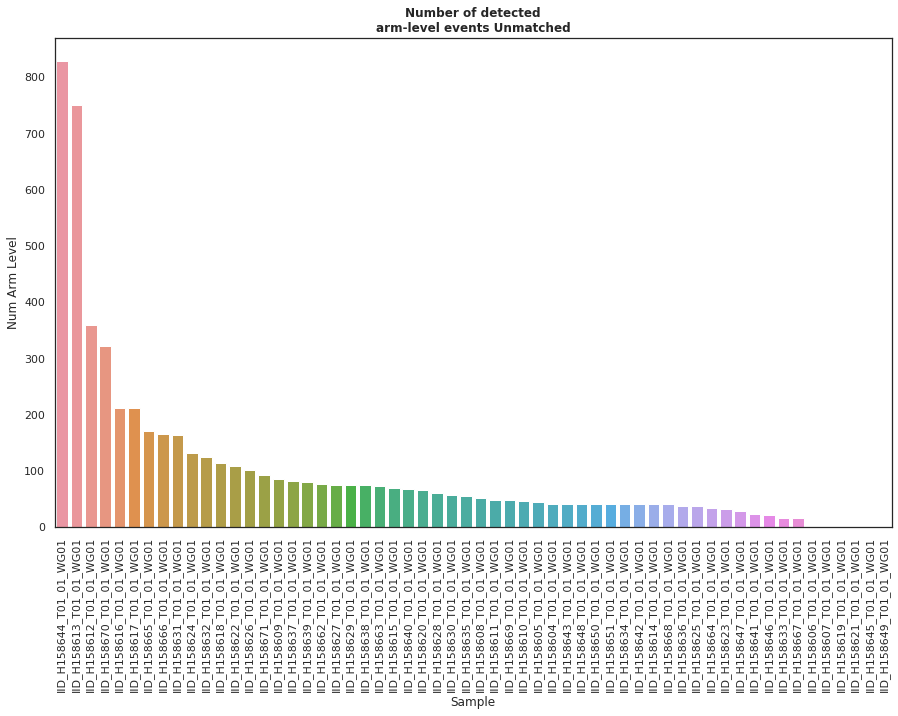

In [75]:
sns.set(rc={'figure.figsize':(15,9)})
sns.set(style="white")
ax=sns.barplot(data=table_tinder_plot, x="Sample", y="Num Arm Level")
plt.xticks(rotation=90)
ax.set_title('Number of detected\narm-level events Unmatched',weight='bold')
#plt.xticks(rotation=45)
plt

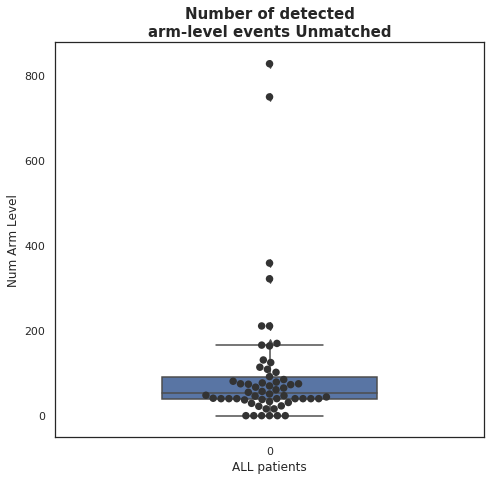

In [76]:
sns.set(rc={'figure.figsize':(7.7,7.27)})
sns.set_style("white")
ax = sns.boxplot(data=table_tinder['Num Arm Level'],width=0.5)
ax = sns.swarmplot(data=table_tinder['Num Arm Level'], color=".2",size=7.5)
ax.set_title('Number of detected\narm-level events Unmatched',weight='bold',size=15)
ax.set(xlabel='ALL patients', ylabel='Num Arm Level')
plt.show()

<module 'matplotlib.pyplot' from '/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

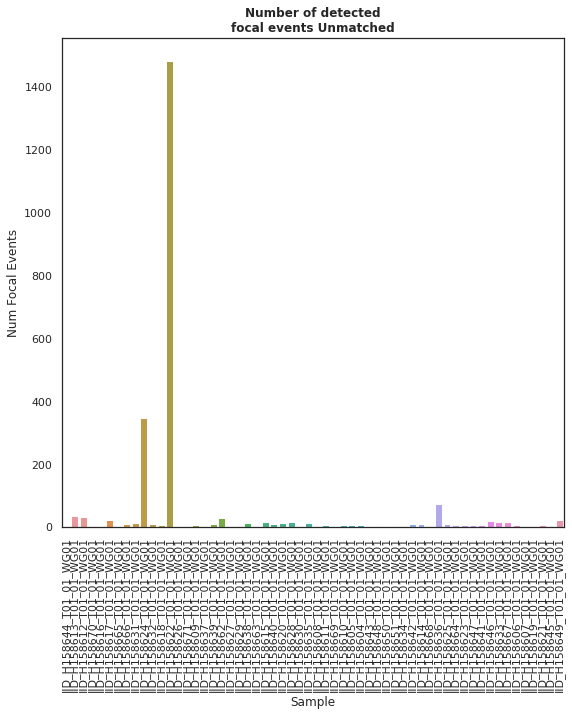

In [77]:
sns.set(rc={'figure.figsize':(9,9)})
sns.set(style="white")
ax=sns.barplot(data=table_tinder_plot, x="Sample", y="Num Focal Events")
plt.xticks(rotation=90)
ax.set_title('Number of detected\nfocal events Unmatched',weight='bold')
#plt.xticks(rotation=45)
plt

In [78]:
table_tinder_plot2=table_tinder.sort_values(by=['Num Focal Events'],ascending=False).reset_index()

<module 'matplotlib.pyplot' from '/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

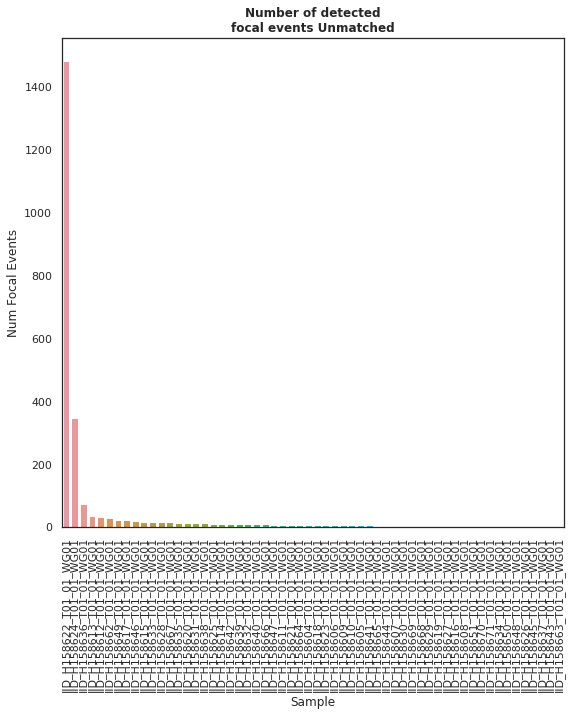

In [79]:
sns.set(style="white")
ax=sns.barplot(data=table_tinder_plot2, x="Sample", y="Num Focal Events")
plt.xticks(rotation=90)
ax.set_title('Number of detected\nfocal events Unmatched',weight='bold')
#plt.xticks(rotation=45)
plt

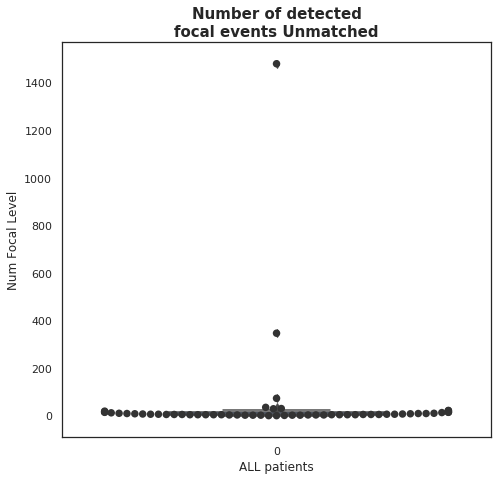

In [80]:
sns.set(rc={'figure.figsize':(7.7,7.27)})
sns.set_style("white")
ax = sns.boxplot(data=table_tinder['Num Focal Events'],width=0.5)
ax = sns.swarmplot(data=table_tinder['Num Focal Events'], color=".2",size=7.5)
ax.set_title('Number of detected\nfocal events Unmatched',weight='bold',size=15)
ax.set(xlabel='ALL patients', ylabel='Num Focal Level')
plt.show()

The three outliers of the list of focal events are these three patients:
    - IID_H158622_T01_01_WG01 (35%)
    - IID_H158624_T01_01_WG01 (5%)
    - IID_H158636_T01_01_WG01 (11%)

In [81]:
table_tinder_plot

,level_0,index,Sample,Num Arm Level,Num Focal Events
0,36,36,IID_H158644_T01_01_WG01,828,4
1,7,7,IID_H158613_T01_01_WG01,750,35
2,6,6,IID_H158612_T01_01_WG01,359,30
3,50,50,IID_H158670_T01_01_WG01,322,3
4,10,10,IID_H158616_T01_01_WG01,211,3
5,11,11,IID_H158617_T01_01_WG01,211,21
6,45,45,IID_H158665_T01_01_WG01,170,4
7,46,46,IID_H158666_T01_01_WG01,166,8
8,23,23,IID_H158631_T01_01_WG01,164,13
9,16,16,IID_H158624_T01_01_WG01,131,347


In [82]:
bar_plot=pd.DataFrame()
bar_plots1=pd.DataFrame()
bar_plots2=pd.DataFrame()

#Arm_TINder
bar_plots1['Sample']=table_tinder_plot['Sample']
bar_plots1['Number']=table_tinder_plot['Num Arm Level']
bar_plots1['Scale']='Arm'
bar_plots2['Sample']=table_tinder_plot['Sample']
bar_plots2['Number']=table_tinder_plot['Num Focal Events']
bar_plots2['Scale']='Focal'

bar_plot=bar_plot.append(bar_plots1,ignore_index=True)
bar_plot=bar_plot.append(bar_plots2,ignore_index=True)

bar_plot['Number']=bar_plot['Number'].map(int)
bar_plot

,Sample,Number,Scale
0,IID_H158644_T01_01_WG01,828,Arm
1,IID_H158613_T01_01_WG01,750,Arm
2,IID_H158612_T01_01_WG01,359,Arm
3,IID_H158670_T01_01_WG01,322,Arm
4,IID_H158616_T01_01_WG01,211,Arm
5,IID_H158617_T01_01_WG01,211,Arm
6,IID_H158665_T01_01_WG01,170,Arm
7,IID_H158666_T01_01_WG01,166,Arm
8,IID_H158631_T01_01_WG01,164,Arm
9,IID_H158624_T01_01_WG01,131,Arm


<module 'matplotlib.pyplot' from '/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

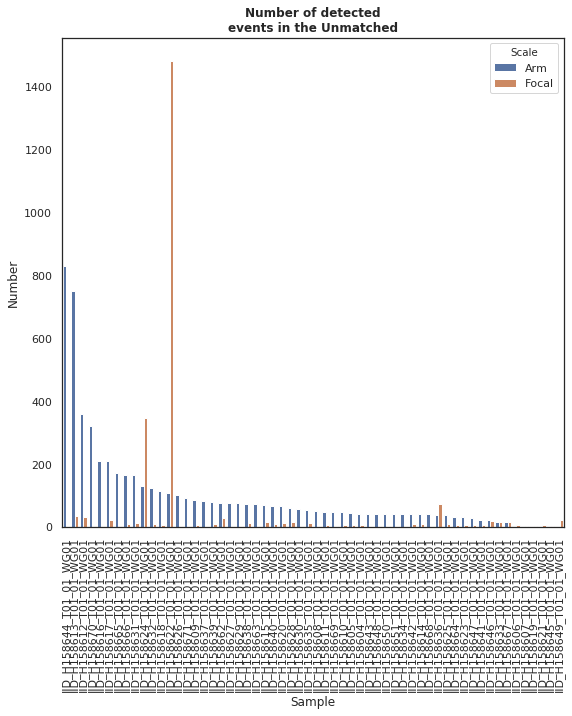

In [83]:
sns.set(rc={'figure.figsize':(9,9)})
sns.set(style="white")
ax=sns.barplot(data=bar_plot, x="Sample", y="Number",hue="Scale")
plt.xticks(rotation=90)
ax.set_title('Number of detected\nevents in the Unmatched',weight='bold')
#plt.xticks(rotation=45)
plt

In [84]:
bar_plot2=bar_plot.sort_values(by=['Number'],ascending=False).reset_index()

<module 'matplotlib.pyplot' from '/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

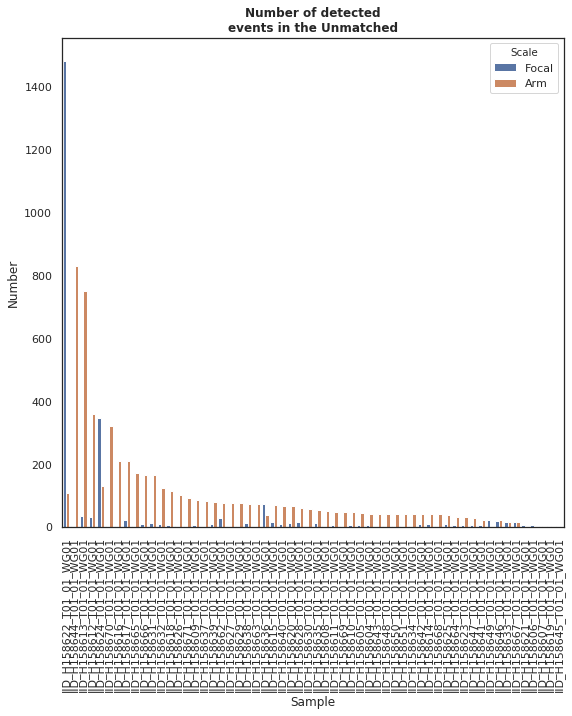

In [85]:
sns.set(style="white")
ax=sns.barplot(data=bar_plot2, x="Sample", y="Number",hue="Scale")
plt.xticks(rotation=90)
ax.set_title('Number of detected\nevents in the Unmatched',weight='bold')
#plt.xticks(rotation=45)
plt

- 2 axis: example

In [86]:
columns = ["labels", "values_a", "values_b", "values_x", "values_y"]
test_data = pd.DataFrame.from_records([("date1", 1, 3, 150, 170),\
                                       ("date2", 2, 6, 200, 180)],\
                                       columns=columns)

test_data_melted = pd.melt(test_data, id_vars=columns[0],\
                           var_name="source", value_name="value_numbers")

In [62]:
test_data

,labels,values_a,values_b,values_x,values_y
0,date1,1,3,150,170
1,date2,2,6,200,180


In [416]:
type(test_data)

pandas.core.frame.DataFrame

In [581]:
test_data_melted

,labels,source,value_numbers
0,date1,values_a,1
1,date2,values_a,2
2,date1,values_b,3
3,date2,values_b,6
4,date1,values_x,150
5,date2,values_x,200
6,date1,values_y,170
7,date2,values_y,180


In [590]:
mask = test_data_melted.source.isin(['values_a', 'values_b'])
mask

0     True
1     True
2     True
3     True
4    False
5    False
6    False
7    False
Name: source, dtype: bool

In [613]:
test_data_melted[~mask].value_numbers
#test_data_melted[mask].value_numbers

4    150
5    200
6    170
7    180
Name: value_numbers, dtype: int64

In [592]:
test_data_melted[~mask].value_numbers.mean()
test_data_melted[mask].value_numbers.mean()
scale = int(test_data_melted[~mask].value_numbers.mean()
            /test_data_melted[mask].value_numbers.mean())
scale

58

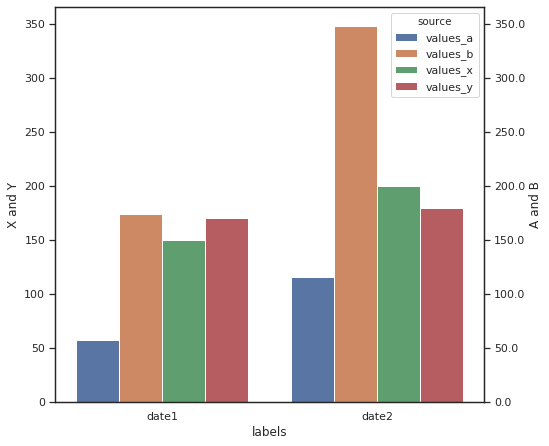

In [624]:
# Scale the data, just a simple example of how you might determine the scaling
mask = test_data_melted.source.isin(['values_a', 'values_b'])
scale = int(test_data_melted[~mask].value_numbers.mean()
            /test_data_melted[mask].value_numbers.mean())
test_data_melted.loc[mask, 'value_numbers'] = test_data_melted.loc[mask, 'value_numbers']*scale

# Plot
fig, ax1 = plt.subplots()
g = sns.barplot(x=columns[0], y="value_numbers", hue="source",\
                data=test_data_melted, ax=ax1)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('X and Y')
ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))
ax2.set_ylabel('A and B')

plt.show()

In [625]:
test_data_melted

,labels,source,value_numbers
0,date1,values_a,58
1,date2,values_a,116
2,date1,values_b,174
3,date2,values_b,348
4,date1,values_x,150
5,date2,values_x,200
6,date1,values_y,170
7,date2,values_y,180


- 2 axis: patients

In [87]:
bar_plot2=bar_plot.sort_values(by=['Number'],ascending=False).reset_index()

In [88]:
bar_plot2_2=bar_plot2
bar_plot2_2

,index,Sample,Number,Scale
0,70,IID_H158622_T01_01_WG01,1481,Focal
1,0,IID_H158644_T01_01_WG01,828,Arm
2,1,IID_H158613_T01_01_WG01,750,Arm
3,2,IID_H158612_T01_01_WG01,359,Arm
4,67,IID_H158624_T01_01_WG01,347,Focal
5,3,IID_H158670_T01_01_WG01,322,Arm
6,4,IID_H158616_T01_01_WG01,211,Arm
7,5,IID_H158617_T01_01_WG01,211,Arm
8,6,IID_H158665_T01_01_WG01,170,Arm
9,7,IID_H158666_T01_01_WG01,166,Arm


In [89]:
bar_plot2_2.Scale.isin(['Focal'])

0       True
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25      True
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48      True
49     False
50     False
51      True
52     False
53      True
54     False
55      True
56     False
57      True
58      True
59      True
60     False
61      True
62      True
63     False
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      True

In [90]:
# Scale the data, just a simple example of how you might determine the scaling
mask2 = bar_plot2_2.Scale.isin(['Focal'])
scale2 = int(bar_plot2_2[~mask2].Number.mean()/bar_plot2_2[mask2].Number.mean())
scale2

2

In [91]:
bar_plot2_2.loc[mask2, 'Number'] = bar_plot2_2.loc[mask2, 'Number']*scale2
bar_plot2_2

,index,Sample,Number,Scale
0,70,IID_H158622_T01_01_WG01,2962,Focal
1,0,IID_H158644_T01_01_WG01,828,Arm
2,1,IID_H158613_T01_01_WG01,750,Arm
3,2,IID_H158612_T01_01_WG01,359,Arm
4,67,IID_H158624_T01_01_WG01,694,Focal
5,3,IID_H158670_T01_01_WG01,322,Arm
6,4,IID_H158616_T01_01_WG01,211,Arm
7,5,IID_H158617_T01_01_WG01,211,Arm
8,6,IID_H158665_T01_01_WG01,170,Arm
9,7,IID_H158666_T01_01_WG01,166,Arm


In [92]:
bar_plot2_2=bar_plot2_2.sort_values(by=['Number'],ascending=False).reset_index()

<module 'matplotlib.pyplot' from '/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

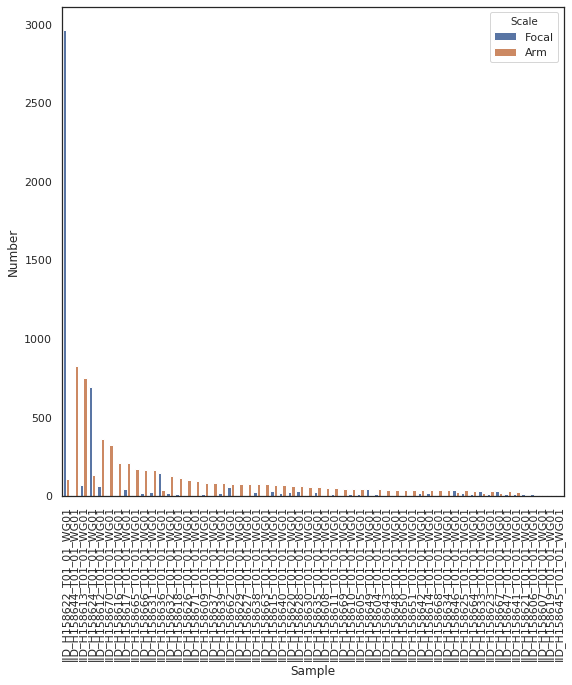

In [93]:
# Plot
fig, ax1 = plt.subplots()
g = sns.barplot(x="Sample", y="Number", hue="Scale",\
                data=bar_plot2_2, ax=ax1)
plt.xticks(rotation=90)
plt

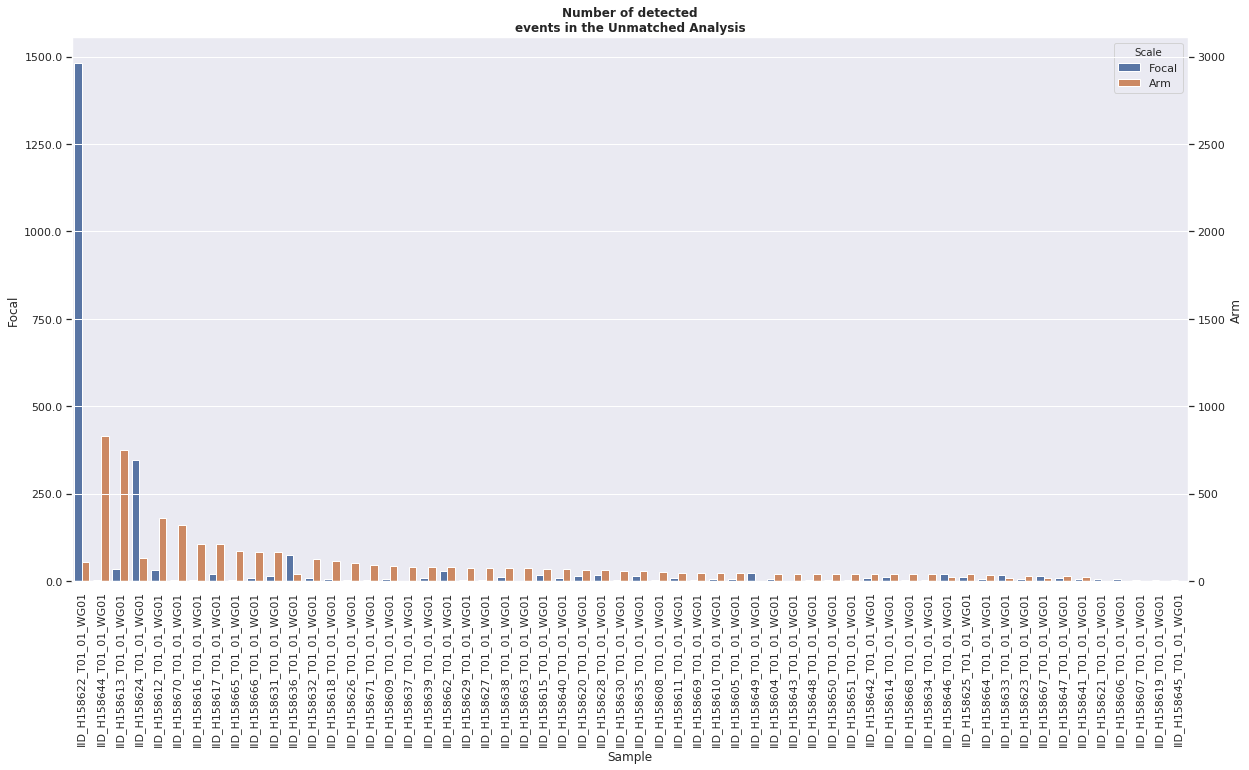

In [94]:
# Plot
sns.set(rc={'figure.figsize':(20,10)})

fig, ax1 = plt.subplots()
g = sns.barplot(x="Sample", y="Number", hue="Scale",\
                data=bar_plot2_2, ax=ax1)
plt.xticks(rotation=90)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Focal')
ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax1.set_yticklabels(np.round(ax2.get_yticks()/scale2,1))
ax2.set_ylabel('Arm')
ax1.set_title('Number of detected\nevents in the Unmatched Analysis',weight='bold')
plt.show()

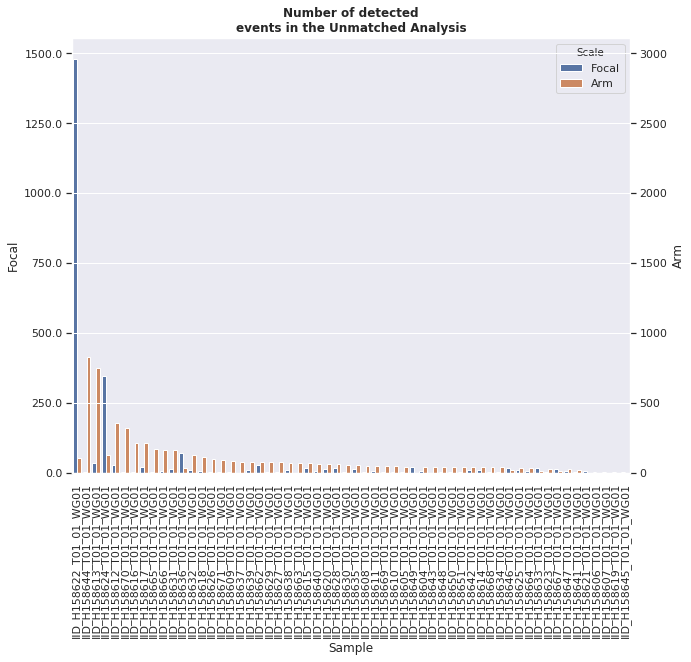

In [95]:
# Plot
sns.set(rc={'figure.figsize':(10,8)})

fig, ax1 = plt.subplots()
g = sns.barplot(x="Sample", y="Number", hue="Scale",\
                data=bar_plot2_2, ax=ax1)
plt.xticks(rotation=90)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Focal')
ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax1.set_yticklabels(np.round(ax2.get_yticks()/scale2,1))
ax2.set_ylabel('Arm')
ax1.set_title('Number of detected\nevents in the Unmatched Analysis',weight='bold')
plt.show()

### BTG

In [96]:
total_BTGs_uk=!isabl get-outdirs -fi application__name BATTENBERG -fi targets__projects 321 -fi status SUCCEEDED
#del total_BTGs_uk[0]
len(total_BTGs_uk)

58

In [97]:
total_BTGs_uk[0]

'Retrieving 57 from analyses API endpoint...'

In [98]:
del total_BTGs_uk[0]

In [99]:
total_BTGs_uk_files=[]
for n in total_BTGs_uk:
    path=n+'/*_subclones.txt'
    file=!ls {path}
    total_BTGs_uk_files.append(file[0])

print(len(total_BTGs_uk_files))
total_BTGs_uk_files

57


['/work/isabl/data/analyses/31/27/253127/IID_H158604_T01_01_WG01_subclones.txt',
 '/work/isabl/data/analyses/31/37/253137/IID_H158607_T01_01_WG01_subclones.txt',
 '/work/isabl/data/analyses/31/47/253147/IID_H158606_T01_01_WG01_subclones.txt',
 '/work/isabl/data/analyses/31/57/253157/IID_H158605_T01_01_WG01_subclones.txt',
 '/work/isabl/data/analyses/32/33/253233/IID_H158608_T01_01_WG01_subclones.txt',
 '/work/isabl/data/analyses/32/45/253245/IID_H158609_T01_01_WG01_subclones.txt',
 '/work/isabl/data/analyses/33/24/253324/IID_H158617_T01_01_WG01_subclones.txt',
 '/work/isabl/data/analyses/33/34/253334/IID_H158610_T01_01_WG01_subclones.txt',
 '/work/isabl/data/analyses/34/12/253412/IID_H158611_T01_01_WG01_subclones.txt',
 '/work/isabl/data/analyses/34/48/253448/IID_H158620_T01_01_WG01_subclones.txt',
 '/work/isabl/data/analyses/34/58/253458/IID_H158619_T01_01_WG01_subclones.txt',
 '/work/isabl/data/analyses/34/68/253468/IID_H158618_T01_01_WG01_subclones.txt',
 '/work/isabl/data/analyses/

The BTG data is going to be generated in this directory: /work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/CNVs/BTGs_subclones_ALLs

In [100]:
directory="/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/CNVs/BTGs_subclones_ALLs/*WG01_subclones.txt"
subclones=!ls {directory}
print(len(subclones))
subclones[0]

57


'/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/CNVs/BTGs_subclones_ALLs/IID_H158604_T01_01_WG01_subclones.txt'

In [101]:
for n in subclones:
    df=pd.read_csv(n,sep='\t')
    file_name=n+'.cns'
    
    for index, row in df.iterrows():
        if row['frac1_A'] == 1:
            df.at[index, 'clone_frac'] = row['frac1_A']
            df.at[index, 'clone_n'] = row['nMaj1_A'] + row['nMin1_A']
            df.at[index, 'clone_maj'] = row['nMaj1_A']
            df.at[index, 'clone_min'] = row['nMin1_A']
            df.at[index, 'subclone_frac'] = row['frac2_A']
            df.at[index, 'subclone_n'] = row['nMaj2_A'] + row['nMin2_A']
            df.at[index, 'subclone_maj'] = row['nMaj2_A']
            df.at[index, 'subclone_min'] = row['nMin2_A']
        elif (row['nMaj1_A'] == 1 ) & (row['nMin1_A'] == 1):
            df.at[index, 'clone_frac'] = row['frac2_A']
            df.at[index, 'clone_n'] = row['nMaj2_A'] + row['nMin2_A']
            df.at[index, 'clone_maj'] = row['nMaj2_A']
            df.at[index, 'clone_min'] = row['nMin2_A']
            df.at[index, 'subclone_frac'] = row['frac1_A']
            df.at[index, 'subclone_n'] = row['nMaj1_A'] + row['nMin1_A']
            df.at[index, 'subclone_maj'] = row['nMaj1_A']
            df.at[index, 'subclone_min'] = row['nMin1_A']
        elif (row['nMaj2_A'] == 1 ) & (row['nMin2_A'] == 1):
            df.at[index, 'clone_frac'] = row['frac1_A']
            df.at[index, 'clone_n'] = row['nMaj1_A'] + row['nMin1_A']
            df.at[index, 'clone_maj'] = row['nMaj1_A']
            df.at[index, 'clone_min'] = row['nMin1_A']
            df.at[index, 'subclone_frac'] = row['frac2_A']
            df.at[index, 'subclone_n'] = row['nMaj2_A'] + row['nMin2_A']
            df.at[index, 'subclone_maj'] = row['nMaj2_A']
            df.at[index, 'subclone_min'] = row['nMin2_A']
        elif (row['frac1_A'] > row['frac2_A']):
            df.at[index, 'clone_frac'] = row['frac1_A']
            df.at[index, 'clone_n'] = row['nMaj1_A'] + row['nMin1_A']
            df.at[index, 'clone_maj'] = row['nMaj1_A']
            df.at[index, 'clone_min'] = row['nMin1_A']
            df.at[index, 'subclone_frac'] = row['frac2_A']
            df.at[index, 'subclone_n'] = row['nMaj2_A'] + row['nMin2_A']
            df.at[index, 'subclone_maj'] = row['nMaj2_A']
            df.at[index, 'subclone_min'] = row['nMin2_A']
        else:
            df.at[index, 'clone_frac'] = row['frac1_A']
            df.at[index, 'clone_n'] = row['nMaj1_A'] + row['nMin1_A']
            df.at[index, 'clone_maj'] = row['nMaj1_A']
            df.at[index, 'clone_min'] = row['nMin1_A']
            df.at[index, 'subclone_frac'] = row['frac2_A']
            df.at[index, 'subclone_n'] = row['nMaj2_A'] + row['nMin2_A']
            df.at[index, 'subclone_maj'] = row['nMaj2_A']
            df.at[index, 'subclone_min'] = row['nMin2_A']    
            
    df=df[['chr','startpos','endpos','BAF','LogR','clone_n','clone_frac','clone_maj','clone_min','subclone_n','subclone_frac','subclone_maj','subclone_min']]
    df.columns=['chromosome','start','end','baf','log2','clone_n','clone_frac','clone_maj','clone_min','subclone_n','subclone_frac','subclone_maj','subclone_min']
    df.to_csv(file_name, sep='\t')

At this point, the files subclones.txt.cns have been successfully generated. 
Now the objective is to put all the info together in one only data frame called BTGs_cells, in order to filter what are the events causing CNVs.

In [102]:
directory="/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/CNVs/BTGs_subclones_ALLs/*WG01_subclones.txt.cns"
subclones_cns=!ls {directory}
len(subclones_cns)

57

In [103]:
import math

In [104]:
BTGs_cells=pd.DataFrame()

chromosome=[]
start=[]
end=[]
cnv=[]
clone_maj=[]
clone_min=[]
cnv_cells=[]
cnv_sub=[]
subclone_maj=[]
subclone_min=[]
cnv_sub_cells=[]
sample=[]

for n in subclones_cns:
    file=pd.read_csv(n,sep='\t')
    name=n.split('/')[10].split('_sub')[0]
    
    for index,row in file.iterrows():
        
        if(math.isnan(row['subclone_n'])):
            chromosome.append(row['chromosome'])
            start.append(row['start'])
            end.append(row['end'])
            cnv.append(int(row['clone_n']))
            clone_maj.append(int(row['clone_maj']))
            clone_min.append(int(row['clone_min']))
            cnv_cells.append(row['clone_frac'])
            cnv_sub.append(2)
            subclone_maj.append(1)
            subclone_min.append(1)
            cnv_sub_cells.append(0)
            sample.append(name)
        else:
            chromosome.append(row['chromosome'])
            start.append(row['start'])
            end.append(row['end'])
            cnv.append(int(row['clone_n']))
            clone_maj.append(int(row['clone_maj']))
            clone_min.append(int(row['clone_min']))
            cnv_cells.append(row['clone_frac'])
            cnv_sub.append(int(row['subclone_n']))
            subclone_maj.append(int(row['subclone_maj']))
            subclone_min.append(int(row['subclone_min']))
            cnv_sub_cells.append(row['subclone_frac'])
            sample.append(name)
        

BTGs_cells['chromosome']=chromosome
BTGs_cells['start']=start
BTGs_cells['end']=end
BTGs_cells['Clone_CNV']=cnv
BTGs_cells['Clone_Maj']=clone_maj
BTGs_cells['Clone_Min']=clone_min
BTGs_cells['Clone_Cells']=cnv_cells
BTGs_cells['Subclone_CNV']=cnv_sub
BTGs_cells['Subclone_Maj']=subclone_maj
BTGs_cells['Subclone_Min']=subclone_min
BTGs_cells['Subclone_Cells']=cnv_sub_cells
BTGs_cells['Sample']=sample

print(BTGs_cells.shape)

(2270, 12)


In [105]:
BTGs_cells_cnv=BTGs_cells[~(  (BTGs_cells['Clone_CNV']==2) & (BTGs_cells['Clone_Maj']==1) & (BTGs_cells['Clone_Min']==1)  &  (BTGs_cells['Subclone_CNV']==2) & (BTGs_cells['Subclone_Maj']==1) & (BTGs_cells['Subclone_Min']==1) )]
print(BTGs_cells_cnv.shape)
BTGs_cells_cnv.head(10)

(739, 12)


,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01
16,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01
18,14,102635925,106019014,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01
39,6,168334813,168599019,3,2,1,0.752870,2,1,1,0.247130,IID_H158605_T01_01_WG01
42,7,38316769,38391904,1,1,0,0.871360,2,1,1,0.128640,IID_H158605_T01_01_WG01
44,7,158188165,158349666,2,2,0,0.443247,3,2,1,0.556753,IID_H158605_T01_01_WG01
48,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01
63,X,1455089,155249621,3,2,1,0.043995,2,1,1,0.956005,IID_H158605_T01_01_WG01


In [106]:
BTGs_cells_cnv_MAIN=BTGs_cells_cnv.copy()

In [107]:
key_list=[]
event_cells=[]
event_cnv=[]
for index,row in BTGs_cells_cnv_MAIN.iterrows():
    key=str(row['chromosome'])+'_'+str(row['start'])+'_'+str(row['end'])+'_'+str(row['Sample'])
    key_list.append(str(row['chromosome'])+'_'+str(row['start'])+'_'+str(row['end'])+'_'+str(row['Sample']))
    
    if( (int(row['Subclone_CNV'])==2) & (int(row['Subclone_Maj'])==1) & (int(row['Subclone_Min'])==1) ):
        #print(key)
        event_cells.append(row['Clone_Cells'])
        event_cnv.append(row['Clone_CNV'])
    
    if( (int(row['Clone_CNV'])==2) & (int(row['Clone_Maj'])==1) & (int(row['Clone_Min'])==1) ):
        #print(key)
        event_cells.append(row['Subclone_Cells'])
        event_cnv.append(row['Subclone_CNV'])
    
    if( (int(row['Subclone_CNV'])!=2) & (int(row['Clone_CNV']!=2))):
        #print(key)
        if(int(row['Clone_Cells']) > int(row['Subclone_Cells'])):
            event_cells.append(row['Clone_Cells'])
            event_cnv.append(row['Clone_CNV'])
        else:
            event_cells.append(row['Subclone_Cells'])
            event_cnv.append(row['Subclone_CNV'])

    if( (int(row['Subclone_CNV'])!=2) & (int(row['Clone_CNV'])==2) & (int(row['Clone_Maj'])==2) & (int(row['Clone_Min'])==0) ) :       
        if(int(row['Clone_Cells']) > int(row['Subclone_Cells'])):
            event_cells.append(row['Clone_Cells'])
            event_cnv.append(row['Clone_CNV'])
        else:
            event_cells.append(row['Subclone_Cells'])
            event_cnv.append(row['Subclone_CNV'])  
            
    if( (int(row['Clone_CNV'])!=2) & (int(row['Subclone_CNV'])==2) & (int(row['Subclone_Maj'])==2) & (int(row['Subclone_Min'])==0) ) :       
        if(int(row['Clone_Cells']) > int(row['Subclone_Cells'])):
            event_cells.append(row['Clone_Cells'])
            event_cnv.append(row['Clone_CNV'])
        else:
            event_cells.append(row['Subclone_Cells'])
            event_cnv.append(row['Subclone_CNV']) 
    
    
print(BTGs_cells_cnv_MAIN.shape)            
print(len(event_cells))

BTGs_cells_cnv_MAIN['Event_CNV']=event_cnv
BTGs_cells_cnv_MAIN['Event_Cells']=event_cells
BTGs_cells_cnv_MAIN['keys']=key_list

(739, 12)
739


In [108]:
print(BTGs_cells_cnv_MAIN.shape)
BTGs_cells_cnv_MAIN.head()

(739, 15)


,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01
16,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01
18,14,102635925,106019014,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_102635925_106019014_IID_H158604_T01_01_WG01
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01


Here, for every locus, the main clone has been selected. This means that if there is a combination of two events at the same locus, only the one represented in the major fraction of cancer cells is the one taken into account.

- Numbers for arm and focal events in BTG results:

In [109]:
#Model for intersection used in TINder
ALLs.head()

,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys
12,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01
14,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01
18,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01
19,14,48539141,49067196,4,3.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48539141_49067196_IID_H158604_T01_01_WG01
20,14,49067196,49406793,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_49067196_49406793_IID_H158604_T01_01_WG01


In [110]:
BTGs_cells_cnv_MAIN_2intersect=BTGs_cells_cnv_MAIN[['chromosome','start','end','Event_CNV','Sample','keys']]

In [111]:
chr_bands.head()

,chr,start,end,band,type,to_index
to_index,,,,,,
1p36.33,1,0,2300000,p36.33,gneg,1p36.33
1p36.32,1,2300000,5400000,p36.32,gpos25,1p36.32
1p36.31,1,5400000,7200000,p36.31,gneg,1p36.31
1p36.23,1,7200000,9200000,p36.23,gpos25,1p36.23
1p36.22,1,9200000,12700000,p36.22,gneg,1p36.22


In [112]:
#list2intersection

list_patient_contig=BedTool(BTGs_cells_cnv_MAIN_2intersect.values.tolist())
list_bed_cytobands=BedTool(chr_bands.values.tolist())

I_cytobands_BTG = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg', 'end_seg', 'CNV','Sample','keys','chr_band', 'start_band', 'end_band', 'name_band', 'type_band','coor_band'])
#I = I[I.chr_band!="X"]
I_cytobands_BTG=I_cytobands_BTG.replace(regex=".call",value="")
print(I_cytobands_BTG.shape)
I_cytobands_BTG.head()

(6135, 12)


,chr_seg,start_seg,end_seg,CNV,Sample,keys,chr_band,start_band,end_band,name_band,type_band,coor_band
0,14,22869678,23003877,0,IID_H158604_T01_01_WG01,14_22869678_23003877_IID_H158604_T01_01_WG01,14,19100000,24600000,q11.2,gneg,14q11.2
1,14,48292129,49460354,3,IID_H158604_T01_01_WG01,14_48292129_49460354_IID_H158604_T01_01_WG01,14,47200000,50900000,q21.3,gpos100,14q21.3
2,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,101400000,103200000,q32.31,gneg,14q32.31
3,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32
4,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,104000000,107349540,q32.33,gneg,14q32.33


In [113]:
## 70% of overlapping between the segment and the band
#I_cytobands_to70=I_cytobands[~( (I_cytobands['start_seg']<I_cytobands['start_band']) & (I_cytobands['end_seg']>I_cytobands['end_band']) )]
I_cytobands_70_BTG=[]

for index,row in I_cytobands_BTG.iterrows():
    band_size=row['end_band']-row['start_band']
    
    #Cases in which the segment starts before the beginning of the band and finishes after the end (100%)
    if((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        I_cytobands_70_BTG.append(row)
        
    #Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(band_size*0.7<segment_size):
            I_cytobands_70_BTG.append(row)

    #Cases in which the segment starts after the beginning of the band and finisihes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(band_size*0.7<segment_size):
            I_cytobands_70_BTG.append(row)
      
    #Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        segment_size=row['end_seg']-row['start_seg']
        if((band_size*0.7)<segment_size):
            I_cytobands_70_BTG.append(row)
                
I_cytobands_70_BTG=pd.DataFrame(I_cytobands_70_BTG)
print(I_cytobands_70_BTG.shape)
I_cytobands_70_BTG.head()

(5375, 12)


,chr_seg,start_seg,end_seg,CNV,Sample,keys,chr_band,start_band,end_band,name_band,type_band,coor_band
3,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32
11,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1
12,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2
15,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32
16,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13


One problem detected in the next row it's that if there are no events in a patient, the sample it's going to be ignored, instead of having a cero, which should be included.

In [114]:
dict_patient={}
for n in BTGs_cells['Sample']:
    dict_patient[n]={n}
    dict_patient[n]=[]
    dict_patient[n].append(0)
len(dict_patient)

57

In [115]:
#Arm

for index,row in I_cytobands_70_BTG.iterrows():
    key=row['Sample']
    dict_patient[key].append(1)
        
sample=[]
number=[]
for keys in dict_patient:
    number.append(sum(dict_patient[keys]))
    sample.append(keys)

table_arm_BTG=pd.DataFrame()
table_arm_BTG['Sample']=sample
table_arm_BTG['Num Arm Level BTG']=number

In [116]:
table_arm_BTG

,Sample,Num Arm Level BTG
0,IID_H158604_T01_01_WG01,1
1,IID_H158605_T01_01_WG01,41
2,IID_H158606_T01_01_WG01,0
3,IID_H158607_T01_01_WG01,0
4,IID_H158608_T01_01_WG01,11
5,IID_H158609_T01_01_WG01,91
6,IID_H158610_T01_01_WG01,5
7,IID_H158611_T01_01_WG01,14
8,IID_H158612_T01_01_WG01,418
9,IID_H158613_T01_01_WG01,770


- FOCAL

In [117]:
BTGs_focal=BTGs_cells_cnv_MAIN[~BTGs_cells_cnv_MAIN['keys'].isin(I_cytobands_70_BTG['keys'])]
print(BTGs_cells_cnv_MAIN.shape)
print(BTGs_focal.shape)
BTGs_focal.head()

(739, 15)
(416, 15)


,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01
16,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01
39,6,168334813,168599019,3,2,1,0.752870,2,1,1,0.247130,IID_H158605_T01_01_WG01,3,0.752870,6_168334813_168599019_IID_H158605_T01_01_WG01


In [118]:
dict_patient={}
for n in BTGs_cells['Sample']:
    dict_patient[n]={n}
    dict_patient[n]=[]
    dict_patient[n].append(0)
len(dict_patient)

57

In [119]:
#Focal

for index2,row2 in BTGs_focal.iterrows():
    key2=row2['Sample']
    dict_patient[key2].append(1)
    
sample=[]
number=[]
for keys in dict_patient:
    number.append(sum(dict_patient[keys]))
    sample.append(keys)

table_focal=pd.DataFrame()
table_focal['Sample']=sample
table_focal['Num Focal Events BTG']=number

In [120]:
table_focal

,Sample,Num Focal Events BTG
0,IID_H158604_T01_01_WG01,3
1,IID_H158605_T01_01_WG01,4
2,IID_H158606_T01_01_WG01,3
3,IID_H158607_T01_01_WG01,4
4,IID_H158608_T01_01_WG01,2
5,IID_H158609_T01_01_WG01,3
6,IID_H158610_T01_01_WG01,6
7,IID_H158611_T01_01_WG01,6
8,IID_H158612_T01_01_WG01,1
9,IID_H158613_T01_01_WG01,24


In [121]:
table_BTG=pd.merge(table_arm_BTG,table_focal,on='Sample')

In [122]:
table_BTG

,Sample,Num Arm Level BTG,Num Focal Events BTG
0,IID_H158604_T01_01_WG01,1,3
1,IID_H158605_T01_01_WG01,41,4
2,IID_H158606_T01_01_WG01,0,3
3,IID_H158607_T01_01_WG01,0,4
4,IID_H158608_T01_01_WG01,11,2
5,IID_H158609_T01_01_WG01,91,3
6,IID_H158610_T01_01_WG01,5,6
7,IID_H158611_T01_01_WG01,14,6
8,IID_H158612_T01_01_WG01,418,1
9,IID_H158613_T01_01_WG01,770,24


In [123]:
bar_plot_BTG=pd.DataFrame()
bar_plots1_BTG=pd.DataFrame()
bar_plots2_BTG=pd.DataFrame()

#Arm_TINder
bar_plots1_BTG['Sample']=table_BTG['Sample']
bar_plots1_BTG['Number']=table_BTG['Num Arm Level BTG']
bar_plots1_BTG['Scale']='Arm'
bar_plots2_BTG['Sample']=table_BTG['Sample']
bar_plots2_BTG['Number']=table_BTG['Num Focal Events BTG']
bar_plots2_BTG['Scale']='Focal'

bar_plot_BTG=bar_plot_BTG.append(bar_plots1_BTG,ignore_index=True)
bar_plot_BTG=bar_plot_BTG.append(bar_plots2_BTG,ignore_index=True)

bar_plot_BTG['Number']=bar_plot_BTG['Number'].map(int)
print(len(bar_plot_BTG))
bar_plot_BTG.head()

114


,Sample,Number,Scale
0,IID_H158604_T01_01_WG01,1,Arm
1,IID_H158605_T01_01_WG01,41,Arm
2,IID_H158606_T01_01_WG01,0,Arm
3,IID_H158607_T01_01_WG01,0,Arm
4,IID_H158608_T01_01_WG01,11,Arm


In [124]:
bar_plot_BTG2=bar_plot_BTG.sort_values(by=['Number'],ascending=False).reset_index()

In [125]:
bar_plot_BTG2_2=bar_plot_BTG2.copy()

In [126]:
bar_plot_BTG2_2.Scale.isin(['Focal'])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40      True
41     False
42     False
43      True
44      True
45      True
46      True
47     False
48      True
49     False
50      True
51      True
52      True
53      True
54     False
55     False
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71     False
72      True
73      True
74      True
75      True
76      True

In [127]:
# Scale the data, just a simple example of how you might determine the scaling
mask2_BTG = bar_plot_BTG2_2.Scale.isin(['Focal'])
scale2_BTG = int(bar_plot_BTG2_2[~mask2_BTG].Number.mean()/bar_plot_BTG2_2[mask2_BTG].Number.mean())
scale2_BTG

12

In [128]:
bar_plot_BTG2_2.loc[mask2_BTG, 'Number'] = bar_plot_BTG2_2.loc[mask2_BTG, 'Number']*scale2_BTG
bar_plot_BTG2_2

,index,Sample,Number,Scale
0,40,IID_H158644_T01_01_WG01,817,Arm
1,9,IID_H158613_T01_01_WG01,770,Arm
2,8,IID_H158612_T01_01_WG01,418,Arm
3,55,IID_H158670_T01_01_WG01,340,Arm
4,39,IID_H158643_T01_01_WG01,326,Arm
5,12,IID_H158616_T01_01_WG01,269,Arm
6,13,IID_H158617_T01_01_WG01,216,Arm
7,28,IID_H158632_T01_01_WG01,162,Arm
8,36,IID_H158640_T01_01_WG01,157,Arm
9,27,IID_H158631_T01_01_WG01,144,Arm


In [129]:
bar_plot_BTG2_2=bar_plot_BTG2_2.sort_values(by=['Number'],ascending=False).reset_index()

<module 'matplotlib.pyplot' from '/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

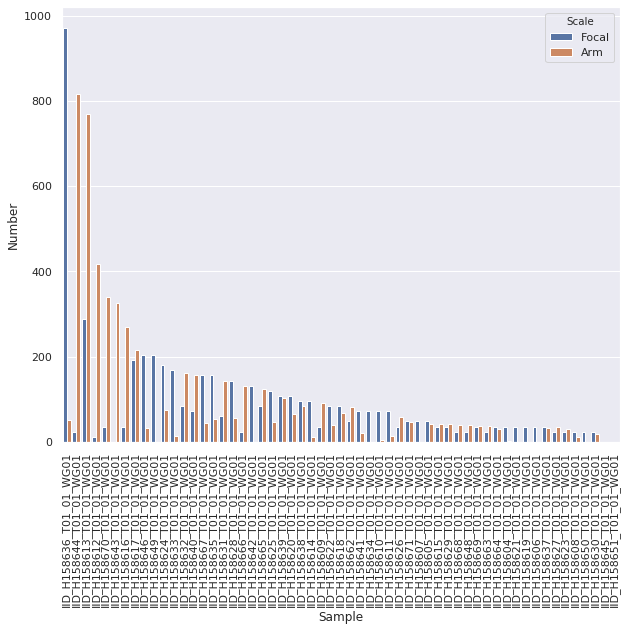

In [130]:
# Plot
sns.set(rc={'figure.figsize':(10,8)})
fig, ax1 = plt.subplots()
g = sns.barplot(x="Sample", y="Number", hue="Scale",\
                data=bar_plot_BTG2_2, ax=ax1)
plt.xticks(rotation=90)
plt

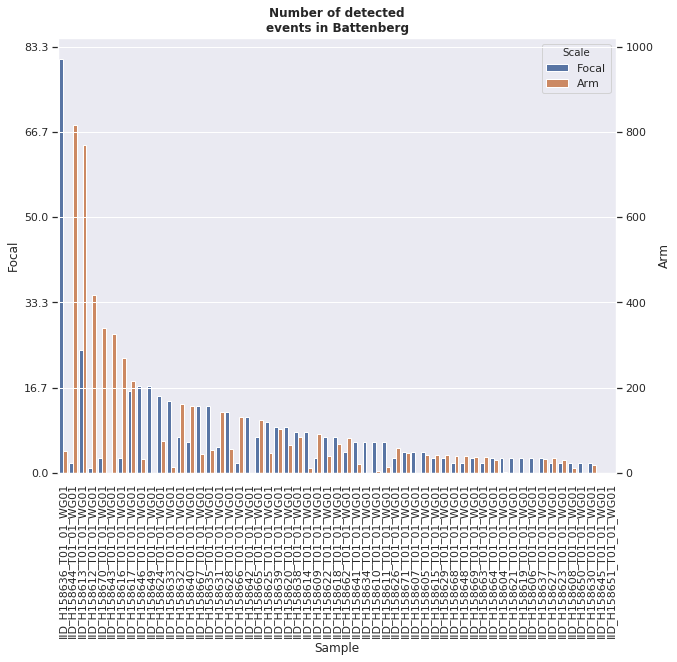

In [131]:
# Plot
sns.set(rc={'figure.figsize':(10,8)})
fig, ax1 = plt.subplots()
g = sns.barplot(x="Sample", y="Number", hue="Scale",\
                data=bar_plot_BTG2_2, ax=ax1)
plt.xticks(rotation=90)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Focal')
ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax1.set_yticklabels(np.round(ax2.get_yticks()/scale2_BTG,1))
ax2.set_ylabel('Arm')
ax1.set_title('Number of detected\nevents in Battenberg',weight='bold')
plt.show()

In [132]:
print(table_BTG.shape)
table_BTG.head()

(57, 3)


,Sample,Num Arm Level BTG,Num Focal Events BTG
0,IID_H158604_T01_01_WG01,1,3
1,IID_H158605_T01_01_WG01,41,4
2,IID_H158606_T01_01_WG01,0,3
3,IID_H158607_T01_01_WG01,0,4
4,IID_H158608_T01_01_WG01,11,2


In [133]:
print(table_tinder_plot.shape)
table_tinder_plot.head()

(58, 5)


,level_0,index,Sample,Num Arm Level,Num Focal Events
0,36,36,IID_H158644_T01_01_WG01,828,4
1,7,7,IID_H158613_T01_01_WG01,750,35
2,6,6,IID_H158612_T01_01_WG01,359,30
3,50,50,IID_H158670_T01_01_WG01,322,3
4,10,10,IID_H158616_T01_01_WG01,211,3


In [134]:
table_TOTAL=pd.merge(table_tinder_plot,table_BTG,on='Sample')

In [135]:
table_TOTAL

,level_0,index,Sample,Num Arm Level,Num Focal Events,Num Arm Level BTG,Num Focal Events BTG
0,36,36,IID_H158644_T01_01_WG01,828,4,817,2
1,7,7,IID_H158613_T01_01_WG01,750,35,770,24
2,6,6,IID_H158612_T01_01_WG01,359,30,418,1
3,50,50,IID_H158670_T01_01_WG01,322,3,340,3
4,10,10,IID_H158616_T01_01_WG01,211,3,269,3
5,11,11,IID_H158617_T01_01_WG01,211,21,216,16
6,45,45,IID_H158665_T01_01_WG01,170,4,125,7
7,46,46,IID_H158666_T01_01_WG01,166,8,132,2
8,23,23,IID_H158631_T01_01_WG01,164,13,144,5
9,16,16,IID_H158624_T01_01_WG01,131,347,76,15


### Violin Plot

In [136]:
violin=pd.DataFrame()
violin1=pd.DataFrame()
violin2=pd.DataFrame()
violin3=pd.DataFrame()
violin4=pd.DataFrame()

#Arm_TINder
violin1['Number']=table_TOTAL['Num Arm Level']
violin1['Scale']='Arm'
violin1['Analysis']='TINder'

#Arm_BTG
violin2['Number']=table_TOTAL['Num Arm Level BTG']
violin2['Scale']='Arm'
violin2['Analysis']='BTG'

#Focal_TINder
violin3['Number']=table_TOTAL['Num Focal Events']
violin3['Scale']='Focal'
violin3['Analysis']='TINder'

#Focal_TINder
violin4['Number']=table_TOTAL['Num Focal Events BTG']
violin4['Scale']='Focal'
violin4['Analysis']='BTG'

violin=violin.append(violin1,ignore_index=True)
violin=violin.append(violin2,ignore_index=True)
violin=violin.append(violin3,ignore_index=True)
violin=violin.append(violin4,ignore_index=True)



violin.head()

,Number,Scale,Analysis
0,828,Arm,TINder
1,750,Arm,TINder
2,359,Arm,TINder
3,322,Arm,TINder
4,211,Arm,TINder


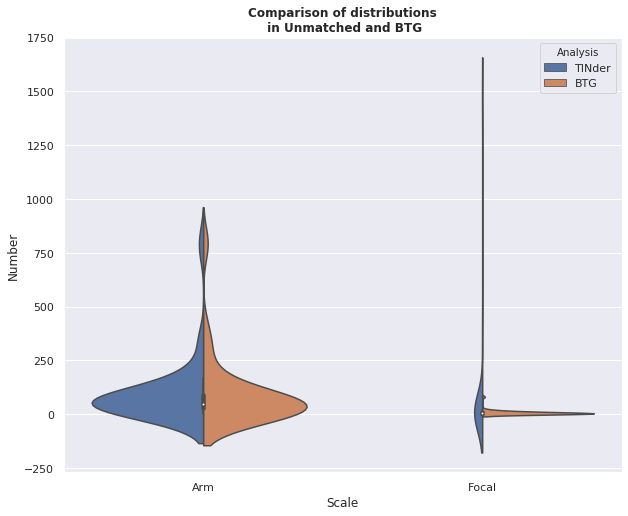

In [137]:
sns.set(rc={'figure.figsize':(10,8)})
violin['Number']=violin['Number'].map(int)
ax = sns.violinplot(x="Scale", y="Number", hue="Analysis",data=violin, dodge=False,split=True)
ax.set_title('Comparison of distributions\n in Unmatched and BTG',weight='bold')
plt.show()

### - Violin 2: no 2 outlier cases in focal events due to noise: 

    - IID_H158622_T01_01_WG01
    - IID_H158624_T01_01_WG01

In [138]:
table_TOTAL2=table_TOTAL[~( (table_TOTAL['Sample']=='IID_H158622_T01_01_WG01') | (table_TOTAL['Sample']=='IID_H158624_T01_01_WG01') )]

In [139]:
table_TOTAL2

,level_0,index,Sample,Num Arm Level,Num Focal Events,Num Arm Level BTG,Num Focal Events BTG
0,36,36,IID_H158644_T01_01_WG01,828,4,817,2
1,7,7,IID_H158613_T01_01_WG01,750,35,770,24
2,6,6,IID_H158612_T01_01_WG01,359,30,418,1
3,50,50,IID_H158670_T01_01_WG01,322,3,340,3
4,10,10,IID_H158616_T01_01_WG01,211,3,269,3
5,11,11,IID_H158617_T01_01_WG01,211,21,216,16
6,45,45,IID_H158665_T01_01_WG01,170,4,125,7
7,46,46,IID_H158666_T01_01_WG01,166,8,132,2
8,23,23,IID_H158631_T01_01_WG01,164,13,144,5
10,24,24,IID_H158632_T01_01_WG01,125,9,162,7


In [140]:
violin=pd.DataFrame()
violin1=pd.DataFrame()
violin2=pd.DataFrame()
violin3=pd.DataFrame()
violin4=pd.DataFrame()

#Arm_TINder
violin1['Number']=table_TOTAL2['Num Arm Level']
violin1['Scale']='Arm'
violin1['Analysis']='TINder'

#Arm_BTG
violin2['Number']=table_TOTAL2['Num Arm Level BTG']
violin2['Scale']='Arm'
violin2['Analysis']='BTG'

#Focal_TINder
violin3['Number']=table_TOTAL2['Num Focal Events']
violin3['Scale']='Focal'
violin3['Analysis']='TINder'

#Focal_TINder
violin4['Number']=table_TOTAL2['Num Focal Events BTG']
violin4['Scale']='Focal'
violin4['Analysis']='BTG'

violin=violin.append(violin1,ignore_index=True)
violin=violin.append(violin2,ignore_index=True)
violin=violin.append(violin3,ignore_index=True)
violin=violin.append(violin4,ignore_index=True)



violin.head()

,Number,Scale,Analysis
0,828,Arm,TINder
1,750,Arm,TINder
2,359,Arm,TINder
3,322,Arm,TINder
4,211,Arm,TINder


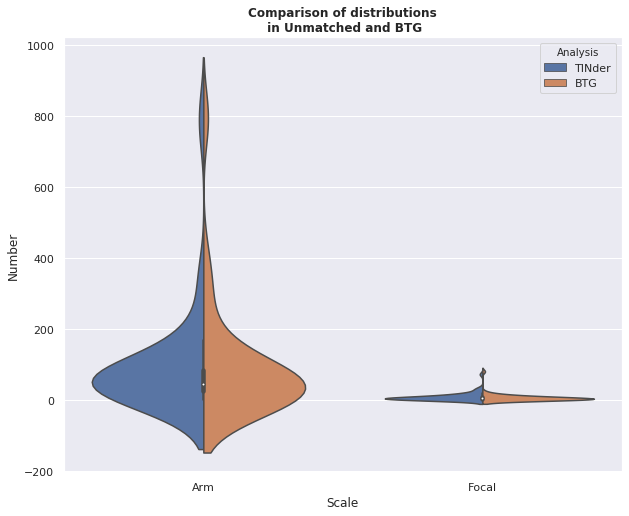

In [141]:
sns.set(rc={'figure.figsize':(10,8)})
violin['Number']=violin['Number'].map(int)
ax = sns.violinplot(x="Scale", y="Number", hue="Analysis",data=violin, dodge=False,split=True)
ax.set_title('Comparison of distributions\n in Unmatched and BTG',weight='bold')
plt.show()

### Intersection: TINder vs BTG

Identification of the events of the ground truth (BTG) that have been detected by TINder.
    
    1. results=I_cytobands_70_BTG/BTGs_focal
    2. chr_bands=I_cytobands_70/Alls_focal_filtered

1) ARM

In [142]:
I_cytobands_70_BTG.head()

,chr_seg,start_seg,end_seg,CNV,Sample,keys,chr_band,start_band,end_band,name_band,type_band,coor_band
3,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32
11,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1
12,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2
15,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32
16,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13


In [143]:
I_cytobands_70.head()

,chr_seg,start_seg,end_seg,CNV,CN1,CN2,Fraction,Sample,chr_band,start_band,end_band,name_band,type_band,coor_band,keys
6,14,102563370,106049067,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,14_102563370_106049067_IID_H158604_T01_01_WG01
9,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,0,4300000,p22.33,gneg,Xp22.33,X_60000_155260560_IID_H158604_T01_01_WG01
10,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,X_60000_155260560_IID_H158604_T01_01_WG01
11,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,X_60000_155260560_IID_H158604_T01_01_WG01
12,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,19300000,21900000,p22.12,gpos50,Xp22.12,X_60000_155260560_IID_H158604_T01_01_WG01


In [144]:
I_cytobands_70_2intersect=I_cytobands_70.copy()
I_cytobands_70_2intersect['to_index']=I_cytobands_70['keys']
I_cytobands_70_2intersect.index = I_cytobands_70_2intersect['to_index']
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
I_cytobands_70_2intersect.head()

,chr_seg,start_seg,end_seg,CNV,CN1,CN2,Fraction,Sample,chr_band,start_band,end_band,name_band,type_band,coor_band,keys,to_index
to_index,,,,,,,,,,,,,,,,
14_102563370_106049067_IID_H158604_T01_01_WG01,14,102563370,106049067,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,14_102563370_106049067_IID_H158604_T01_01_WG01,14_102563370_106049067_IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,0,4300000,p22.33,gneg,Xp22.33,X_60000_155260560_IID_H158604_T01_01_WG01,X_60000_155260560_IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,X_60000_155260560_IID_H158604_T01_01_WG01,X_60000_155260560_IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,X_60000_155260560_IID_H158604_T01_01_WG01,X_60000_155260560_IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,19300000,21900000,p22.12,gpos50,Xp22.12,X_60000_155260560_IID_H158604_T01_01_WG01,X_60000_155260560_IID_H158604_T01_01_WG01


In [145]:
I_cytobands_70_2intersect2=I_cytobands_70_2intersect[['chr_seg','start_seg','end_seg','CNV','Fraction','keys','Sample']]
I_cytobands_70_2intersect2['CNV']=I_cytobands_70_2intersect2['CNV'].map(str)
I_cytobands_70_2intersect2['Fraction']=I_cytobands_70_2intersect2['Fraction'].map(str)
I_cytobands_70_2intersect2.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chr_seg,start_seg,end_seg,CNV,Fraction,keys,Sample
to_index,,,,,,,
14_102563370_106049067_IID_H158604_T01_01_WG01,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,X_60000_155260560_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,X_60000_155260560_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,X_60000_155260560_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,X_60000_155260560_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01


In [146]:
I_cytobands_70_BTG.head()

,chr_seg,start_seg,end_seg,CNV,Sample,keys,chr_band,start_band,end_band,name_band,type_band,coor_band
3,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32
11,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1
12,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2
15,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32
16,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13


In [147]:
I_cytobands_70_BTG_2intersect=I_cytobands_70_BTG[['chr_seg','start_seg','end_seg','CNV','keys','Sample']]
I_cytobands_70_BTG_2intersect['CNV']=I_cytobands_70_BTG_2intersect['CNV'].map(str)
I_cytobands_70_BTG_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr_seg,start_seg,end_seg,CNV,keys,Sample
3,14,102635925,106019014,0,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
11,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
12,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
15,X,1455089,155249621,3,X_1455089_155249621_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
16,X,1455089,155249621,3,X_1455089_155249621_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01


In [148]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(I_cytobands_70_BTG_2intersect.values.tolist())
list_bed_cytobands=BedTool(I_cytobands_70_2intersect2.values.tolist())

I_cytobands_70_BTG_InterARM = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','CNV_BTG','keys','Sample','chr_band', 'start_band', 'end_band','CNV_UNM','Fraction','keys2','Sample', ])
#I = I[I.chr_band!="X"]
print(I_cytobands_70_BTG_InterARM.shape)
I_cytobands_70_BTG_InterARM.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(2070383, 13)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,chr_seg,start_seg,end_seg,CNV_BTG,keys,Sample,chr_band,start_band,end_band,CNV_UNM,Fraction,keys2,Sample.1
0,14,102635925,106019014,0,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,102563370,106049067,1,1.000000,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
1,14,102635925,106019014,0,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,103071856,104521742,3,0.350000,14_103071856_104521742_IID_H158624_T01_01_WG01,IID_H158624_T01_01_WG01
2,14,102635925,106019014,0,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,22977387,107289540,5,0.246368,14_22977387_107289540_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
3,14,102635925,106019014,0,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,22977387,107289540,5,0.246368,14_22977387_107289540_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
4,14,102635925,106019014,0,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,22977387,107289540,5,0.246368,14_22977387_107289540_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01


In [149]:
I_cytobands_70_BTG_InterARM_PATIENT=I_cytobands_70_BTG_InterARM[I_cytobands_70_BTG_InterARM['Sample']==I_cytobands_70_BTG_InterARM['Sample.1']]
print(I_cytobands_70_BTG_InterARM_PATIENT.shape)
I_cytobands_70_BTG_InterARM_PATIENT.head()

(147025, 13)


,chr_seg,start_seg,end_seg,CNV_BTG,keys,Sample,chr_band,start_band,end_band,CNV_UNM,Fraction,keys2,Sample.1
0,14,102635925,106019014,0,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
84,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
85,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
86,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424527,22380856,1,NaN,9_15424527_22380856_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
87,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424527,22380856,1,NaN,9_15424527_22380856_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01


In [150]:
print(len(I_cytobands_70_BTG_InterARM_PATIENT['keys'].unique()))

274


In [151]:
#70%

I_cytobands_70_BTG_InterARM_PATIENT['start_seg']=I_cytobands_70_BTG_InterARM_PATIENT['start_seg'].astype(int)
I_cytobands_70_BTG_InterARM_PATIENT['end_seg']=I_cytobands_70_BTG_InterARM_PATIENT['end_seg'].astype(int)
I_cytobands_70_BTG_InterARM_PATIENT['start_band']=I_cytobands_70_BTG_InterARM_PATIENT['start_band'].astype(int)
I_cytobands_70_BTG_InterARM_PATIENT['end_band']=I_cytobands_70_BTG_InterARM_PATIENT['end_band'].astype(int) 

I_cytobands_70_BTG_InterARM_PATIENT_70=[]
for index,row in I_cytobands_70_BTG_InterARM_PATIENT.iterrows():
    band_size=row['end_band']-row['start_band']
    
    # 1. Cases in which the segment starts after the beginning of the band and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_cytobands_70_BTG_InterARM_PATIENT_70.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(band_size*0.7<segment_size):
            I_cytobands_70_BTG_InterARM_PATIENT_70.append(row)

    # 3. Cases in which the segment starts after the beginning of the band and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(band_size*0.7<segment_size):
            I_cytobands_70_BTG_InterARM_PATIENT_70.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the band and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_seg']
        if((band_size*0.7)<segment_size):
            I_cytobands_70_BTG_InterARM_PATIENT_70.append(row)
   

I_cytobands_70_BTG_InterARM_PATIENT_70=pd.DataFrame(I_cytobands_70_BTG_InterARM_PATIENT_70)
print(I_cytobands_70_BTG_InterARM_PATIENT_70.shape)
print(len(I_cytobands_70_BTG_InterARM_PATIENT_70['keys'].unique()))
I_cytobands_70_BTG_InterARM_PATIENT_70.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/

(143627, 13)
265


,chr_seg,start_seg,end_seg,CNV_BTG,keys,Sample,chr_band,start_band,end_band,CNV_UNM,Fraction,keys2,Sample.1
0,14,102635925,106019014,0,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
84,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
85,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
86,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424527,22380856,1,NaN,9_15424527_22380856_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
87,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424527,22380856,1,NaN,9_15424527_22380856_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01


When we take into account intersection of at least the 70% of the region overlapping, we have 220 regions out of 233.

In [152]:
#50%

I_cytobands_70_BTG_InterARM_PATIENT['start_seg']=I_cytobands_70_BTG_InterARM_PATIENT['start_seg'].astype(int)
I_cytobands_70_BTG_InterARM_PATIENT['end_seg']=I_cytobands_70_BTG_InterARM_PATIENT['end_seg'].astype(int)
I_cytobands_70_BTG_InterARM_PATIENT['start_band']=I_cytobands_70_BTG_InterARM_PATIENT['start_band'].astype(int)
I_cytobands_70_BTG_InterARM_PATIENT['end_band']=I_cytobands_70_BTG_InterARM_PATIENT['end_band'].astype(int) 

I_cytobands_70_BTG_InterARM_PATIENT_50=[]
for index,row in I_cytobands_70_BTG_InterARM_PATIENT.iterrows():
    dup_size=row['end_band']-row['start_band']
    
    # 1. Cases in which the segment starts before the beginning of the arm and finishes after the end (100%)
    if((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        I_cytobands_70_BTG_InterARM_PATIENT_50.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(dup_size*0.5<segment_size):
            I_cytobands_70_BTG_InterARM_PATIENT_50.append(row)

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_band']
        if(dup_size*0.5<segment_size):
            I_cytobands_70_BTG_InterARM_PATIENT_50.append(row)
        
    # 4. Cases in which the segment starts after the beginning of the arm and finishes before the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] > row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if((dup_size*0.5)<segment_size):
            I_cytobands_70_BTG_InterARM_PATIENT_50.append(row)
   

I_cytobands_70_BTG_InterARM_PATIENT_50=pd.DataFrame(I_cytobands_70_BTG_InterARM_PATIENT_50)
print(I_cytobands_70_BTG_InterARM_PATIENT_50.shape)
print(len(I_cytobands_70_BTG_InterARM_PATIENT_50['keys'].unique()))
I_cytobands_70_BTG_InterARM_PATIENT_50.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/

(143072, 13)
262


,chr_seg,start_seg,end_seg,CNV_BTG,keys,Sample,chr_band,start_band,end_band,CNV_UNM,Fraction,keys2,Sample.1
0,14,102635925,106019014,0,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
84,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
85,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
86,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424527,22380856,1,NaN,9_15424527_22380856_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
87,9,15424938,22351206,1,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424527,22380856,1,NaN,9_15424527_22380856_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01


- ARM Detection

In [153]:
print(I_cytobands_70_BTG.shape)
I_cytobands_70_BTG.head()

(5375, 12)


,chr_seg,start_seg,end_seg,CNV,Sample,keys,chr_band,start_band,end_band,name_band,type_band,coor_band
3,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32
11,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1
12,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2
15,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32
16,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13


In [154]:
I_cytobands_70_BTG_DETECT=I_cytobands_70_BTG.copy()

In [155]:
detection=[]
for index,row in I_cytobands_70_BTG.iterrows():
    if (str(row['keys']) in I_cytobands_70_BTG_InterARM_PATIENT_70['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
I_cytobands_70_BTG_DETECT['Detection']=detection
I_cytobands_70_BTG_DETECT[I_cytobands_70_BTG_DETECT['Detection']=='Detected'].head()

5375


,chr_seg,start_seg,end_seg,CNV,Sample,keys,chr_band,start_band,end_band,name_band,type_band,coor_band,Detection
3,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,Detected
11,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1,Detected
12,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2,Detected
15,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,Detected
16,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,Detected


In [156]:
#I_cytobands_70_BTG_DETECT[((I_cytobands_70_BTG_DETECT['Sample']=='IID_H158612_T01_01_WG01') & (I_cytobands_70_BTG_DETECT['chr_seg']=='6'))]
#I_cytobands_70_BTG_InterARM_PATIENT[((I_cytobands_70_BTG_InterARM_PATIENT['Sample']=='IID_H158612_T01_01_WG01') & (I_cytobands_70_BTG_InterARM_PATIENT['chr_seg']=='6'))]
#I_cytobands_70_2intersect2[((I_cytobands_70_2intersect2['Sample']=='IID_H158612_T01_01_WG01') & (I_cytobands_70_2intersect2['chr_seg']=='6'))]

In [157]:
print(I_cytobands_70_BTG_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in I_cytobands_70_BTG_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(5375, 13)
4459 916


- Add cnv_MAIN information (% cells):

In [158]:
I_cytobands_70_BTG_DETECT.head()

,chr_seg,start_seg,end_seg,CNV,Sample,keys,chr_band,start_band,end_band,name_band,type_band,coor_band,Detection
3,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,Detected
11,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1,Detected
12,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2,Detected
15,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,Detected
16,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,Detected


In [159]:
BTGs_cells_cnv_MAIN.head()

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01
16,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01
18,14,102635925,106019014,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_102635925_106019014_IID_H158604_T01_01_WG01
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01


In [160]:
BTGs_cells_cnv_MAIN['keys']=BTGs_cells_cnv_MAIN['chromosome'].map(str)+'_'+BTGs_cells_cnv_MAIN['start'].map(str)+'_'+BTGs_cells_cnv_MAIN['end'].map(str)+'_'+BTGs_cells_cnv_MAIN['Sample']
BTGs_cells_cnv_MAIN.head()

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01
16,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01
18,14,102635925,106019014,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_102635925_106019014_IID_H158604_T01_01_WG01
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01


In [161]:
I_cytobands_70_BTG_DETECT_CELLs=pd.merge(I_cytobands_70_BTG_DETECT,BTGs_cells_cnv_MAIN,on='keys')
I_cytobands_70_BTG_DETECT_CELLs.head()

,chr_seg,start_seg,end_seg,CNV,Sample_x,keys,chr_band,start_band,end_band,name_band,type_band,coor_band,Detection,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample_y,Event_CNV,Event_Cells
0,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,Detected,14,102635925,106019014,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000
1,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793
2,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793
3,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,Detected,X,1455089,155249621,3,2,1,0.043995,2,1,1,0.956005,IID_H158605_T01_01_WG01,3,0.043995
4,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,Detected,X,1455089,155249621,3,2,1,0.043995,2,1,1,0.956005,IID_H158605_T01_01_WG01,3,0.043995


In [162]:
print(I_cytobands_70_BTG_DETECT.shape)
print(I_cytobands_70_BTG_DETECT_CELLs.shape)

(5375, 13)
(5375, 27)


In [163]:
I_cytobands_70_BTG_DETECT_CELLs.to_csv('/home/gutierj2/uk_all/I_cytobands_70_BTG_DETECT_CELLs_SUBCLONES_FOCAL_DGV_Dan.tsv',sep='\t')

- Not consider events in Sex chromosomes:

#- There are three patients which have pending the generation of the results of TINder, so they should be eliminated from the final numbers: 
    #- IID_H158640_T01_01_WG01
    #- IID_H158664_T01_01_WG01
    #- IID_H158649_T01_01_WG01

In [164]:
#I_cytobands_70_BTG_DETECT_CELLs_3patientsFAILED=I_cytobands_70_BTG_DETECT[~( (I_cytobands_70_BTG_DETECT['Sample']=='IID_H158640_T01_01_WG01') | (I_cytobands_70_BTG_DETECT['Sample']=='IID_H158649_T01_01_WG01')|(I_cytobands_70_BTG_DETECT['Sample']=='IID_H158664_T01_01_WG01'))]

#print(I_cytobands_70_BTG_DETECT_CELLs_3patientsFAILED.shape)
#detected_count=0
#nondetected_count=0
#for index,row in I_cytobands_70_BTG_DETECT_3patientsFAILED.iterrows():
    #if (str(row['Detection'])=='Detected'):
         #detected_count += 1
    #else:
        #nondetected_count += 1

#print(detected_count,nondetected_count)

2) FOCAL

In [165]:
print(BTGs_focal.shape)
BTGs_focal.head()

(416, 15)


,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01
16,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01
39,6,168334813,168599019,3,2,1,0.752870,2,1,1,0.247130,IID_H158605_T01_01_WG01,3,0.752870,6_168334813_168599019_IID_H158605_T01_01_WG01


In [166]:
BTGs_focal_2intersect=BTGs_focal[['chromosome','start','end','keys','Sample']]
BTGs_focal_2intersect.head()

,chromosome,start,end,keys,Sample
14,14,22869678,23003877,14_22869678_23003877_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
16,14,48292129,49460354,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
28,22,41443817,41525173,22_41443817_41525173_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
33,2,89247310,89325821,2_89247310_89325821_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
39,6,168334813,168599019,6_168334813_168599019_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01


In [167]:
ALLs_focal_filtered_2intersect=ALLs_focal_filtered.copy()
ALLs_focal_filtered_2intersect['to_index']=ALLs_focal_filtered['keys']
ALLs_focal_filtered_2intersect.index = ALLs_focal_filtered_2intersect['to_index']
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
ALLs_focal_filtered_2intersect.head(5)

,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys,to_index
to_index,,,,,,,,,,
12_6613261_6792403_IID_H158604_T01_01_WG01,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01
12_7995932_8125508_IID_H158604_T01_01_WG01,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01
14_48268583_48539141_IID_H158604_T01_01_WG01,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01
14_48539141_49067196_IID_H158604_T01_01_WG01,14,48539141,49067196,4,3.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48539141_49067196_IID_H158604_T01_01_WG01,14_48539141_49067196_IID_H158604_T01_01_WG01
14_49067196_49406793_IID_H158604_T01_01_WG01,14,49067196,49406793,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_49067196_49406793_IID_H158604_T01_01_WG01,14_49067196_49406793_IID_H158604_T01_01_WG01


In [168]:
ALLs_focal_filtered_2intersect2=ALLs_focal_filtered_2intersect[['chromosome','start','end','CNV','Fraction','keys','Sample']]
ALLs_focal_filtered_2intersect2['CNV']=ALLs_focal_filtered_2intersect2['CNV'].map(str)
ALLs_focal_filtered_2intersect2['Fraction']=ALLs_focal_filtered_2intersect2['Fraction'].map(str)
ALLs_focal_filtered_2intersect2.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chromosome,start,end,CNV,Fraction,keys,Sample
to_index,,,,,,,
12_6613261_6792403_IID_H158604_T01_01_WG01,12,6613261,6792403,3,1.0,12_6613261_6792403_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
12_7995932_8125508_IID_H158604_T01_01_WG01,12,7995932,8125508,3,1.0,12_7995932_8125508_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
14_48268583_48539141_IID_H158604_T01_01_WG01,14,48268583,48539141,3,1.0,14_48268583_48539141_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
14_48539141_49067196_IID_H158604_T01_01_WG01,14,48539141,49067196,4,1.0,14_48539141_49067196_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
14_49067196_49406793_IID_H158604_T01_01_WG01,14,49067196,49406793,3,1.0,14_49067196_49406793_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01


In [169]:
#list2intersection

list_patient_contig=BedTool(BTGs_focal_2intersect.values.tolist())
list_bed_cytobands=BedTool(ALLs_focal_filtered_2intersect2.values.tolist())

BTGs_focal_InterFOCAL = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','keys','Sample','chr_band', 'start_band', 'end_band','CNV_UNM','Fraction', 'keys2','Sample'])
#I = I[I.chr_band!="X"]
print(BTGs_focal_InterFOCAL.shape)
BTGs_focal_InterFOCAL.head()

(2118, 12)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,chr_seg,start_seg,end_seg,keys,Sample,chr_band,start_band,end_band,CNV_UNM,Fraction,keys2,Sample.1
0,14,22869678,23003877,14_22869678_23003877_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,22395116,22992317,0,0.44,14_22395116_22992317_IID_H158611_T01_01_WG01,IID_H158611_T01_01_WG01
1,14,22869678,23003877,14_22869678_23003877_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,22387651,22985785,3,0.98,14_22387651_22985785_IID_H158662_T01_01_WG01,IID_H158662_T01_01_WG01
2,14,22869678,23003877,14_22869678_23003877_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,22339129,23093095,3,1.00,14_22339129_23093095_IID_H158622_T01_01_WG01,IID_H158622_T01_01_WG01
3,14,22869678,23003877,14_22869678_23003877_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,22141306,23753748,3,0.39,14_22141306_23753748_IID_H158624_T01_01_WG01,IID_H158624_T01_01_WG01
4,14,48292129,49460354,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,48268583,48539141,3,1.00,14_48268583_48539141_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01


In [170]:
BTGs_focal_InterFOCAL_PATIENT=BTGs_focal_InterFOCAL[BTGs_focal_InterFOCAL['Sample']==BTGs_focal_InterFOCAL['Sample.1']]

In [171]:
len(BTGs_focal_InterFOCAL_PATIENT['keys'].unique())

276

In [172]:
#70%

BTGs_focal_InterFOCAL_PATIENT['start_seg']=BTGs_focal_InterFOCAL_PATIENT['start_seg'].astype(int)
BTGs_focal_InterFOCAL_PATIENT['end_seg']=BTGs_focal_InterFOCAL_PATIENT['end_seg'].astype(int)
BTGs_focal_InterFOCAL_PATIENT['start_band']=BTGs_focal_InterFOCAL_PATIENT['start_band'].astype(int)
BTGs_focal_InterFOCAL_PATIENT['end_band']=BTGs_focal_InterFOCAL_PATIENT['end_band'].astype(int) 

BTGs_focal_InterFOCAL_PATIENT_70=[]
for index,row in BTGs_focal_InterFOCAL_PATIENT.iterrows():
    band_size=row['end_band']-row['start_band']
    
    # 1. Cases in which the segment starts after the beginning of the band and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        BTGs_focal_InterFOCAL_PATIENT_70.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(band_size*0.7<segment_size):
            BTGs_focal_InterFOCAL_PATIENT_70.append(row)

    # 3. Cases in which the segment starts after the beginning of the band and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(band_size*0.7<segment_size):
            BTGs_focal_InterFOCAL_PATIENT_70.append(row)
        
    # 4. Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_seg']
        if((band_size*0.7)<segment_size):
            BTGs_focal_InterFOCAL_PATIENT_70.append(row)
   

BTGs_focal_InterFOCAL_PATIENT_70=pd.DataFrame(BTGs_focal_InterFOCAL_PATIENT_70)
print(BTGs_focal_InterFOCAL_PATIENT_70.shape)
print(len(BTGs_focal_InterFOCAL_PATIENT_70['keys'].unique()))
BTGs_focal_InterFOCAL_PATIENT_70.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/

(327, 12)
262


,chr_seg,start_seg,end_seg,keys,Sample,chr_band,start_band,end_band,CNV_UNM,Fraction,keys2,Sample.1
4,14,48292129,49460354,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,48268583,48539141,3,1.0,14_48268583_48539141_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
5,14,48292129,49460354,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,48539141,49067196,4,1.0,14_48539141_49067196_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
6,14,48292129,49460354,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,49067196,49406793,3,1.0,14_49067196_49406793_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
10,6,168334813,168599019,6_168334813_168599019_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,6,168333121,168598049,3,1.0,6_168333121_168598049_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
13,9,121179044,121295287,9_121179044_121295287_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,9,121152952,121294770,1,1.0,9_121152952_121294770_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01


In [173]:
BTGs_focal_DETECT=BTGs_focal.copy()
BTGs_focal_DETECT.shape

(416, 15)

In [174]:
detection=[]
for index,row in BTGs_focal.iterrows():
    if (str(row['keys']) in BTGs_focal_InterFOCAL_PATIENT_70['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')
     
BTGs_focal_DETECT['Detection']=detection
BTGs_focal_DETECT.head()

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01,Non Detected
16,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,Detected
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01,Non Detected
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01,Non Detected
39,6,168334813,168599019,3,2,1,0.752870,2,1,1,0.247130,IID_H158605_T01_01_WG01,3,0.752870,6_168334813_168599019_IID_H158605_T01_01_WG01,Detected


In [175]:
print(BTGs_focal_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in BTGs_focal_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(416, 16)
262 154


In [176]:
BTGs_focal_DETECT.head()

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01,Non Detected
16,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,Detected
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01,Non Detected
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01,Non Detected
39,6,168334813,168599019,3,2,1,0.752870,2,1,1,0.247130,IID_H158605_T01_01_WG01,3,0.752870,6_168334813_168599019_IID_H158605_T01_01_WG01,Detected


# NOTE:

Now, I take the NonDetected results, to try to do intersection with them against ArmLevel in TINder.

In [177]:
I_cytobands_70.head()

,chr_seg,start_seg,end_seg,CNV,CN1,CN2,Fraction,Sample,chr_band,start_band,end_band,name_band,type_band,coor_band,keys
6,14,102563370,106049067,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,14_102563370_106049067_IID_H158604_T01_01_WG01
9,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,0,4300000,p22.33,gneg,Xp22.33,X_60000_155260560_IID_H158604_T01_01_WG01
10,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,X_60000_155260560_IID_H158604_T01_01_WG01
11,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,X_60000_155260560_IID_H158604_T01_01_WG01
12,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,19300000,21900000,p22.12,gpos50,Xp22.12,X_60000_155260560_IID_H158604_T01_01_WG01


In [178]:
I_cytobands_70_2intersect=I_cytobands_70.copy()
I_cytobands_70_2intersect['to_index']=I_cytobands_70['keys']
I_cytobands_70_2intersect.index = I_cytobands_70_2intersect['to_index']
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
I_cytobands_70_2intersect.head()

,chr_seg,start_seg,end_seg,CNV,CN1,CN2,Fraction,Sample,chr_band,start_band,end_band,name_band,type_band,coor_band,keys,to_index
to_index,,,,,,,,,,,,,,,,
14_102563370_106049067_IID_H158604_T01_01_WG01,14,102563370,106049067,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,14_102563370_106049067_IID_H158604_T01_01_WG01,14_102563370_106049067_IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,0,4300000,p22.33,gneg,Xp22.33,X_60000_155260560_IID_H158604_T01_01_WG01,X_60000_155260560_IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,X_60000_155260560_IID_H158604_T01_01_WG01,X_60000_155260560_IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,X_60000_155260560_IID_H158604_T01_01_WG01,X_60000_155260560_IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,19300000,21900000,p22.12,gpos50,Xp22.12,X_60000_155260560_IID_H158604_T01_01_WG01,X_60000_155260560_IID_H158604_T01_01_WG01


In [179]:
I_cytobands_70_2intersect2=I_cytobands_70_2intersect[['chr_seg','start_seg','end_seg','CNV','Fraction','keys','Sample']]
I_cytobands_70_2intersect2['CNV']=I_cytobands_70_2intersect2['CNV'].map(str)
I_cytobands_70_2intersect2['Fraction']=I_cytobands_70_2intersect2['Fraction'].map(str)
I_cytobands_70_2intersect2.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chr_seg,start_seg,end_seg,CNV,Fraction,keys,Sample
to_index,,,,,,,
14_102563370_106049067_IID_H158604_T01_01_WG01,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,X_60000_155260560_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,X_60000_155260560_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,X_60000_155260560_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
X_60000_155260560_IID_H158604_T01_01_WG01,X,60000,155260560,1,1.0,X_60000_155260560_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01


In [180]:
BTGs_focal_DETECT_interARM=BTGs_focal_DETECT[BTGs_focal_DETECT['Detection']=='Non Detected']
BTGs_focal_DETECT_interARM.head()

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01,Non Detected
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01,Non Detected
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01,Non Detected
42,7,38316769,38391904,1,1,0,0.871360,2,1,1,0.128640,IID_H158605_T01_01_WG01,1,0.871360,7_38316769_38391904_IID_H158605_T01_01_WG01,Non Detected
44,7,158188165,158349666,2,2,0,0.443247,3,2,1,0.556753,IID_H158605_T01_01_WG01,3,0.556753,7_158188165_158349666_IID_H158605_T01_01_WG01,Non Detected


In [181]:
BTGs_focal_DETECT_interARM_2intersect=BTGs_focal_DETECT_interARM[['chromosome','start','end','Clone_CNV','Clone_Cells','keys','Sample']]
BTGs_focal_DETECT_interARM_2intersect['Clone_CNV']=BTGs_focal_DETECT_interARM_2intersect['Clone_CNV'].map(str)
BTGs_focal_DETECT_interARM_2intersect['Clone_Cells']=BTGs_focal_DETECT_interARM_2intersect['Clone_Cells'].map(str)
BTGs_focal_DETECT_interARM_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chromosome,start,end,Clone_CNV,Clone_Cells,keys,Sample
14,14,22869678,23003877,0,1.0,14_22869678_23003877_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
28,22,41443817,41525173,3,1.0,22_41443817_41525173_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
33,2,89247310,89325821,1,0.75500921107566,2_89247310_89325821_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
42,7,38316769,38391904,1,0.871360116363626,7_38316769_38391904_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
44,7,158188165,158349666,2,0.443247116874586,7_158188165_158349666_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01


In [182]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(BTGs_focal_DETECT_interARM_2intersect.values.tolist())
list_bed_cytobands=BedTool(I_cytobands_70_2intersect2.values.tolist())

BTGs_focal_DETECT_interARM_result = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','CNV_BTG','Cells_BTG','keys','Sample','chr_band', 'start_band', 'end_band','CNV_UNM','Fraction','keys2','Sample', ])
#I = I[I.chr_band!="X"]
print(BTGs_focal_DETECT_interARM_result.shape)
BTGs_focal_DETECT_interARM_result.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(34631, 14)


,chr_seg,start_seg,end_seg,CNV_BTG,Cells_BTG,keys,Sample,chr_band,start_band,end_band,CNV_UNM,Fraction,keys2,Sample.1
0,14,22869678,23003877,0,1.0,14_22869678_23003877_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,22977387,107289540,5,0.246368,14_22977387_107289540_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
1,14,22869678,23003877,0,1.0,14_22869678_23003877_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,22977387,107289540,5,0.246368,14_22977387_107289540_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
2,14,22869678,23003877,0,1.0,14_22869678_23003877_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,22977387,107289540,5,0.246368,14_22977387_107289540_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
3,14,22869678,23003877,0,1.0,14_22869678_23003877_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,22977387,107289540,5,0.246368,14_22977387_107289540_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
4,14,22869678,23003877,0,1.0,14_22869678_23003877_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,22977387,107289540,5,0.246368,14_22977387_107289540_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01


In [183]:
BTGs_focal_DETECT_interARM_result_PATIENT=BTGs_focal_DETECT_interARM_result[BTGs_focal_DETECT_interARM_result['Sample']==BTGs_focal_DETECT_interARM_result['Sample.1']]
print(BTGs_focal_DETECT_interARM_result_PATIENT.shape)
BTGs_focal_DETECT_interARM_result_PATIENT.head()

(452, 14)


,chr_seg,start_seg,end_seg,CNV_BTG,Cells_BTG,keys,Sample,chr_band,start_band,end_band,CNV_UNM,Fraction,keys2,Sample.1
1572,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01
1573,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01
1574,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01
1575,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01
1576,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01


In [184]:
print(len(BTGs_focal_DETECT_interARM_result_PATIENT['keys'].unique()))

34


In [185]:
#70%

BTGs_focal_DETECT_interARM_result_PATIENT['start_seg']=BTGs_focal_DETECT_interARM_result_PATIENT['start_seg'].astype(int)
BTGs_focal_DETECT_interARM_result_PATIENT['end_seg']=BTGs_focal_DETECT_interARM_result_PATIENT['end_seg'].astype(int)
BTGs_focal_DETECT_interARM_result_PATIENT['start_band']=BTGs_focal_DETECT_interARM_result_PATIENT['start_band'].astype(int)
BTGs_focal_DETECT_interARM_result_PATIENT['end_band']=BTGs_focal_DETECT_interARM_result_PATIENT['end_band'].astype(int) 

BTGs_focal_DETECT_interARM_result_PATIENT_70=[]
for index,row in BTGs_focal_DETECT_interARM_result_PATIENT.iterrows():
    band_size=row['end_band']-row['start_band']
    
    # 1. Cases in which the segment starts after the beginning of the band and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        BTGs_focal_DETECT_interARM_result_PATIENT_70.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(band_size*0.7<segment_size):
            BTGs_focal_DETECT_interARM_result_PATIENT_70.append(row)

    # 3. Cases in which the segment starts after the beginning of the band and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(band_size*0.7<segment_size):
            BTGs_focal_DETECT_interARM_result_PATIENT_70.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the band and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_seg']
        if((band_size*0.7)<segment_size):
            BTGs_focal_DETECT_interARM_result_PATIENT_70.append(row)
   

BTGs_focal_DETECT_interARM_result_PATIENT_70=pd.DataFrame(BTGs_focal_DETECT_interARM_result_PATIENT_70)
print(BTGs_focal_DETECT_interARM_result_PATIENT_70.shape)
print(len(BTGs_focal_DETECT_interARM_result_PATIENT_70['keys'].unique()))
BTGs_focal_DETECT_interARM_result_PATIENT_70.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/

(433, 14)
31


,chr_seg,start_seg,end_seg,CNV_BTG,Cells_BTG,keys,Sample,chr_band,start_band,end_band,CNV_UNM,Fraction,keys2,Sample.1
1572,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01
1573,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01
1574,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01
1575,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01
1576,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01


In [186]:
print(BTGs_focal_DETECT_interARM_result_PATIENT_70.shape)
BTGs_focal_DETECT_interARM_result_PATIENT_70.head()

(433, 14)


,chr_seg,start_seg,end_seg,CNV_BTG,Cells_BTG,keys,Sample,chr_band,start_band,end_band,CNV_UNM,Fraction,keys2,Sample.1
1572,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01
1573,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01
1574,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01
1575,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01
1576,7,38337589,38395429,0,1.0,7_38337589_38395429_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,7,45000,159120001,1,0.47,7_45000_159120001_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01


In [187]:
BTGs_focal_DETECT_interARM_DETECT=BTGs_focal_DETECT_interARM.copy()

In [188]:
detection=[]
for index,row in BTGs_focal_DETECT_interARM_DETECT.iterrows():
    if (str(row['keys']) in BTGs_focal_DETECT_interARM_result_PATIENT_70['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
BTGs_focal_DETECT_interARM_DETECT['Detection']=detection
BTGs_focal_DETECT_interARM_DETECT.head()

154


,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01,Non Detected
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01,Non Detected
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01,Non Detected
42,7,38316769,38391904,1,1,0,0.871360,2,1,1,0.128640,IID_H158605_T01_01_WG01,1,0.871360,7_38316769_38391904_IID_H158605_T01_01_WG01,Non Detected
44,7,158188165,158349666,2,2,0,0.443247,3,2,1,0.556753,IID_H158605_T01_01_WG01,3,0.556753,7_158188165_158349666_IID_H158605_T01_01_WG01,Non Detected


In [189]:
#I_cytobands_70_BTG_DETECT[((I_cytobands_70_BTG_DETECT['Sample']=='IID_H158612_T01_01_WG01') & (I_cytobands_70_BTG_DETECT['chr_seg']=='6'))]
#I_cytobands_70_BTG_InterARM_PATIENT[((I_cytobands_70_BTG_InterARM_PATIENT['Sample']=='IID_H158612_T01_01_WG01') & (I_cytobands_70_BTG_InterARM_PATIENT['chr_seg']=='6'))]
#I_cytobands_70_2intersect2[((I_cytobands_70_2intersect2['Sample']=='IID_H158612_T01_01_WG01') & (I_cytobands_70_2intersect2['chr_seg']=='6'))]

In [190]:
print(BTGs_focal_DETECT_interARM_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in BTGs_focal_DETECT_interARM_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(154, 16)
31 123


In [191]:
BTGs_focal_DETECT_interARM_DETECT.head()

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01,Non Detected
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01,Non Detected
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01,Non Detected
42,7,38316769,38391904,1,1,0,0.871360,2,1,1,0.128640,IID_H158605_T01_01_WG01,1,0.871360,7_38316769_38391904_IID_H158605_T01_01_WG01,Non Detected
44,7,158188165,158349666,2,2,0,0.443247,3,2,1,0.556753,IID_H158605_T01_01_WG01,3,0.556753,7_158188165_158349666_IID_H158605_T01_01_WG01,Non Detected


- Add cnv_MAIN information (% cells):

Here is not necessary because the BTGs_focal conserves the info of clones, because it's the result of not an intersection as I_cytobands but an anti-intersection.

In [192]:
BTGs_focal_DETECT_CELLs=BTGs_focal_DETECT.copy()

In [193]:
BTGs_focal_DETECT_CELLs.head()

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01,Non Detected
16,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,Detected
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01,Non Detected
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01,Non Detected
39,6,168334813,168599019,3,2,1,0.752870,2,1,1,0.247130,IID_H158605_T01_01_WG01,3,0.752870,6_168334813_168599019_IID_H158605_T01_01_WG01,Detected


In [194]:
BTGs_focal_DETECT_interARM_DETECT.head()

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01,Non Detected
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01,Non Detected
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01,Non Detected
42,7,38316769,38391904,1,1,0,0.871360,2,1,1,0.128640,IID_H158605_T01_01_WG01,1,0.871360,7_38316769_38391904_IID_H158605_T01_01_WG01,Non Detected
44,7,158188165,158349666,2,2,0,0.443247,3,2,1,0.556753,IID_H158605_T01_01_WG01,3,0.556753,7_158188165_158349666_IID_H158605_T01_01_WG01,Non Detected


In [195]:
BTGs_focal_DETECT_interARM_DETECT_CELLs=BTGs_focal_DETECT_interARM_DETECT.copy()

- Merge: BTGs_focal_DETECT + BTGs_focal_DETECT_interARM_DETECT_CELLs

In [196]:
BTGs_focal_DETECT_CELLs_2total=BTGs_focal_DETECT_CELLs[BTGs_focal_DETECT_CELLs['Detection']=='Detected']
BTGs_focal_DETECT_interARM_DETECT_CELLs

BTGs_focal_DETECT_TOTAL=pd.concat([BTGs_focal_DETECT_CELLs_2total,BTGs_focal_DETECT_interARM_DETECT_CELLs])

In [197]:
print(BTGs_focal.shape)
print(BTGs_focal_DETECT_TOTAL.shape)

(416, 15)
(416, 16)


In [198]:
BTGs_focal_DETECT_TOTAL.to_csv('/home/gutierj2/uk_all/BTGs_focal_DETECT_CELLs_SUBCLONES_FOCAL_DGV_Dan.tsv',sep='\t')

#- There are three patients which have pending the generation of the results of TINder, so they should be eliminated from the final numbers: 
    #- IID_H158640_T01_01_WG01
    #- IID_H158664_T01_01_WG01
    #- IID_H158649_T01_01_WG01

In [199]:
#BTGs_focal_DETECT_CELLs_3patientsFAILED=BTGs_focal_DETECT_CELLs[~( (BTGs_focal_DETECT_CELLs['Sample']=='IID_H158640_T01_01_WG01') | (BTGs_focal_DETECT_CELLs['Sample']=='IID_H158649_T01_01_WG01')|(BTGs_focal_DETECT_CELLs['Sample']=='IID_H158664_T01_01_WG01'))]

#print(BTGs_focal_DETECT_CELLs_3patientsFAILED.shape)
#detected_count=0
#nondetected_count=0
#for index,row in BTGs_focal_DETECT_CELLs_3patientsFAILED.iterrows():
    #if (str(row['Detection'])=='Detected'):
         #detected_count += 1
    #else:
        #nondetected_count += 1

#print(detected_count,nondetected_count)

# Precision:

1) Subset of samples:

In [200]:
table_TOTAL

,level_0,index,Sample,Num Arm Level,Num Focal Events,Num Arm Level BTG,Num Focal Events BTG
0,36,36,IID_H158644_T01_01_WG01,828,4,817,2
1,7,7,IID_H158613_T01_01_WG01,750,35,770,24
2,6,6,IID_H158612_T01_01_WG01,359,30,418,1
3,50,50,IID_H158670_T01_01_WG01,322,3,340,3
4,10,10,IID_H158616_T01_01_WG01,211,3,269,3
5,11,11,IID_H158617_T01_01_WG01,211,21,216,16
6,45,45,IID_H158665_T01_01_WG01,170,4,125,7
7,46,46,IID_H158666_T01_01_WG01,166,8,132,2
8,23,23,IID_H158631_T01_01_WG01,164,13,144,5
9,16,16,IID_H158624_T01_01_WG01,131,347,76,15


1) ARM

In [201]:
I_cytobands_70.head()

,chr_seg,start_seg,end_seg,CNV,CN1,CN2,Fraction,Sample,chr_band,start_band,end_band,name_band,type_band,coor_band,keys
6,14,102563370,106049067,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,14_102563370_106049067_IID_H158604_T01_01_WG01
9,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,0,4300000,p22.33,gneg,Xp22.33,X_60000_155260560_IID_H158604_T01_01_WG01
10,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,X_60000_155260560_IID_H158604_T01_01_WG01
11,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,X_60000_155260560_IID_H158604_T01_01_WG01
12,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,19300000,21900000,p22.12,gpos50,Xp22.12,X_60000_155260560_IID_H158604_T01_01_WG01


In [202]:
#Subset of samples to work: 54 (TINder + BTG)
#number=0
#number_list=[]

#I_cytobands_70_54PATIENTS=pd.DataFrame(columns=['chr_seg','start_seg','end_seg','CNV','Sample','chr_band','start_band','end_band','name_band','type_band','coor_band','keys'])

#for index,row in I_cytobands_70.iterrows():
    #if(row['Sample'] in list(table_TOTAL['Sample'])):
        #I_cytobands_70_54PATIENTS=I_cytobands_70_54PATIENTS.append(row)  

#print(I_cytobands_70.shape)
#print(I_cytobands_70_54PATIENTS.shape)

In [203]:
#I_cytobands_70_54PATIENTS.head()

2) FOCAL

In [204]:
ALLs_focal_filtered_INDEX=ALLs_focal_filtered.reset_index(drop=True)
ALLs_focal_filtered_INDEX.head()

,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys
0,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01
1,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01
2,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01
3,14,48539141,49067196,4,3.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48539141_49067196_IID_H158604_T01_01_WG01
4,14,49067196,49406793,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_49067196_49406793_IID_H158604_T01_01_WG01


In [205]:
#Subset of samples to work: 54 (TINder + BTG)
#number=0
#number_list=[]

#ALLs_focal_filtered_INDEX_54PATIENTS=pd.DataFrame(columns=['chromosome','start','end','CNV','Sample','keys'])
#for index,row in ALLs_focal_filtered_INDEX.iterrows():
    #if(row['Sample'] in list(table_TOTAL['Sample'])):
       #ALLs_focal_filtered_INDEX_54PATIENTS=ALLs_focal_filtered_INDEX_54PATIENTS.append(row)  

#print(ALLs_focal_filtered_INDEX.shape)
#print(ALLs_focal_filtered_INDEX_54PATIENTS.shape)

- INTERSECTION: ARM

In [206]:
I_cytobands_70_BTG_DETECT_CELLs.head()

,chr_seg,start_seg,end_seg,CNV,Sample_x,keys,chr_band,start_band,end_band,name_band,type_band,coor_band,Detection,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample_y,Event_CNV,Event_Cells
0,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,Detected,14,102635925,106019014,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000
1,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793
2,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793
3,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,Detected,X,1455089,155249621,3,2,1,0.043995,2,1,1,0.956005,IID_H158605_T01_01_WG01,3,0.043995
4,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,Detected,X,1455089,155249621,3,2,1,0.043995,2,1,1,0.956005,IID_H158605_T01_01_WG01,3,0.043995


In [207]:
I_cytobands_70_BTG_DETECT_CELLs_2intersect=I_cytobands_70_BTG_DETECT_CELLs.copy()
I_cytobands_70_BTG_DETECT_CELLs_2intersect['to_index']=I_cytobands_70_BTG_DETECT_CELLs['keys']
I_cytobands_70_BTG_DETECT_CELLs_2intersect.index = I_cytobands_70_BTG_DETECT_CELLs_2intersect['to_index']
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
I_cytobands_70_BTG_DETECT_CELLs_2intersect.head()

,chr_seg,start_seg,end_seg,CNV,Sample_x,keys,chr_band,start_band,end_band,name_band,type_band,coor_band,Detection,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample_y,Event_CNV,Event_Cells,to_index
to_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14_102635925_106019014_IID_H158604_T01_01_WG01,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,Detected,14,102635925,106019014,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_102635925_106019014_IID_H158604_T01_01_WG01
9_15424938_22351206_IID_H158605_T01_01_WG01,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01
9_15424938_22351206_IID_H158605_T01_01_WG01,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01
X_1455089_155249621_IID_H158605_T01_01_WG01,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,Detected,X,1455089,155249621,3,2,1,0.043995,2,1,1,0.956005,IID_H158605_T01_01_WG01,3,0.043995,X_1455089_155249621_IID_H158605_T01_01_WG01
X_1455089_155249621_IID_H158605_T01_01_WG01,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,Detected,X,1455089,155249621,3,2,1,0.043995,2,1,1,0.956005,IID_H158605_T01_01_WG01,3,0.043995,X_1455089_155249621_IID_H158605_T01_01_WG01


In [208]:
I_cytobands_70_BTG_DETECT_CELLs_2intersect2=I_cytobands_70_BTG_DETECT_CELLs_2intersect[['chr_seg','start_seg','end_seg','Event_CNV','Event_Cells','keys','Sample_x']]
I_cytobands_70_BTG_DETECT_CELLs_2intersect2['Event_CNV']=I_cytobands_70_BTG_DETECT_CELLs_2intersect2['Event_CNV'].map(str)
I_cytobands_70_BTG_DETECT_CELLs_2intersect2['Event_Cells']=I_cytobands_70_BTG_DETECT_CELLs_2intersect2['Event_Cells'].map(str)
I_cytobands_70_BTG_DETECT_CELLs_2intersect2.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chr_seg,start_seg,end_seg,Event_CNV,Event_Cells,keys,Sample_x
to_index,,,,,,,
14_102635925_106019014_IID_H158604_T01_01_WG01,14,102635925,106019014,0,1.0,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
9_15424938_22351206_IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.7727930316818571,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
9_15424938_22351206_IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.7727930316818571,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
X_1455089_155249621_IID_H158605_T01_01_WG01,X,1455089,155249621,3,0.0439947699359178,X_1455089_155249621_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
X_1455089_155249621_IID_H158605_T01_01_WG01,X,1455089,155249621,3,0.0439947699359178,X_1455089_155249621_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01


ARM

In [209]:
I_cytobands_70.head()

,chr_seg,start_seg,end_seg,CNV,CN1,CN2,Fraction,Sample,chr_band,start_band,end_band,name_band,type_band,coor_band,keys
6,14,102563370,106049067,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,14_102563370_106049067_IID_H158604_T01_01_WG01
9,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,0,4300000,p22.33,gneg,Xp22.33,X_60000_155260560_IID_H158604_T01_01_WG01
10,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,X_60000_155260560_IID_H158604_T01_01_WG01
11,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,X_60000_155260560_IID_H158604_T01_01_WG01
12,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,19300000,21900000,p22.12,gpos50,Xp22.12,X_60000_155260560_IID_H158604_T01_01_WG01


In [210]:
I_cytobands_70_2intersect=I_cytobands_70[['chr_seg','start_seg','end_seg','CNV','Fraction','keys','Sample']]
I_cytobands_70_2intersect['CNV']=I_cytobands_70_2intersect['CNV'].map(str)
I_cytobands_70_2intersect['Fraction']=I_cytobands_70_2intersect['Fraction'].map(str)
I_cytobands_70_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chr_seg,start_seg,end_seg,CNV,Fraction,keys,Sample
6,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
9,X,60000,155260560,1,1.0,X_60000_155260560_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
10,X,60000,155260560,1,1.0,X_60000_155260560_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
11,X,60000,155260560,1,1.0,X_60000_155260560_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
12,X,60000,155260560,1,1.0,X_60000_155260560_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01


In [211]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(I_cytobands_70_2intersect.values.tolist())
list_bed_cytobands=BedTool(I_cytobands_70_BTG_DETECT_CELLs_2intersect2.values.tolist())

I_cytobands_UNMATCHED_ARM = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','CNV_UNM','Fraction','keys','Sample','chr_band', 'start_band', 'end_band','Event_CNVs','Event_Cells','keys2','Sample'])
#I = I[I.chr_band!="X"]
print(I_cytobands_UNMATCHED_ARM.shape)
I_cytobands_UNMATCHED_ARM.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(2070383, 14)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,chr_seg,start_seg,end_seg,CNV_UNM,Fraction,keys,Sample,chr_band,start_band,end_band,Event_CNVs,Event_Cells,keys2,Sample.1
0,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,102635925,106019014,0,1.0,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
1,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,20433516,107289436,4,1.0,14_20433516_107289436_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
2,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,20433516,107289436,4,1.0,14_20433516_107289436_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
3,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,20433516,107289436,4,1.0,14_20433516_107289436_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
4,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,20433516,107289436,4,1.0,14_20433516_107289436_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01


In [212]:
I_cytobands_UNMATCHED_ARM_PATIENT=I_cytobands_UNMATCHED_ARM[I_cytobands_UNMATCHED_ARM['Sample']==I_cytobands_UNMATCHED_ARM['Sample.1']]
print(I_cytobands_UNMATCHED_ARM_PATIENT.shape)
I_cytobands_UNMATCHED_ARM_PATIENT.head()

(147025, 14)


,chr_seg,start_seg,end_seg,CNV_UNM,Fraction,keys,Sample,chr_band,start_band,end_band,Event_CNVs,Event_Cells,keys2,Sample.1
0,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,102635925,106019014,0,1.000000,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
25284,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
25285,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
25598,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
25599,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01


In [213]:
#70%

I_cytobands_UNMATCHED_ARM_PATIENT['start_seg']=I_cytobands_UNMATCHED_ARM_PATIENT['start_seg'].astype(int)
I_cytobands_UNMATCHED_ARM_PATIENT['end_seg']=I_cytobands_UNMATCHED_ARM_PATIENT['end_seg'].astype(int)
I_cytobands_UNMATCHED_ARM_PATIENT['start_band']=I_cytobands_UNMATCHED_ARM_PATIENT['start_band'].astype(int)
I_cytobands_UNMATCHED_ARM_PATIENT['end_band']=I_cytobands_UNMATCHED_ARM_PATIENT['end_band'].astype(int) 

I_cytobands_UNMATCHED_ARM_PATIENT_70=[]
for index,row in I_cytobands_UNMATCHED_ARM_PATIENT.iterrows():
    band_size=row['end_band']-row['start_band']
    
    # 1. Cases in which the segment starts after the beginning of the band and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_cytobands_UNMATCHED_ARM_PATIENT_70.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(band_size*0.7<segment_size):
            I_cytobands_UNMATCHED_ARM_PATIENT_70.append(row)

    # 3. Cases in which the segment starts after the beginning of the band and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(band_size*0.7<segment_size):
            I_cytobands_UNMATCHED_ARM_PATIENT_70.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the band and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((band_size*0.7)<segment_size):
            I_cytobands_UNMATCHED_ARM_PATIENT_70.append(row)
   

I_cytobands_UNMATCHED_ARM_PATIENT_70=pd.DataFrame(I_cytobands_UNMATCHED_ARM_PATIENT_70)
print(I_cytobands_UNMATCHED_ARM_PATIENT_70.shape)
print(len(I_cytobands_UNMATCHED_ARM_PATIENT_70['keys'].unique()))
I_cytobands_UNMATCHED_ARM_PATIENT_70.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/

(140287, 14)
297


,chr_seg,start_seg,end_seg,CNV_UNM,Fraction,keys,Sample,chr_band,start_band,end_band,Event_CNVs,Event_Cells,keys2,Sample.1
0,14,102563370,106049067,1,1.0,14_102563370_106049067_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,102635925,106019014,0,1.000000,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
25284,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
25285,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
25598,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
25599,9,15424400,22380933,1,1.0,9_15424400_22380933_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01


In [214]:
I_cytobands_UNMATCHED_ARM_PATIENT[I_cytobands_UNMATCHED_ARM_PATIENT['Sample']=='IID_H158612_T01_01_WG01'].head()

,chr_seg,start_seg,end_seg,CNV_UNM,Fraction,keys,Sample,chr_band,start_band,end_band,Event_CNVs,Event_Cells,keys2,Sample.1
167310,2,10000,3733241,3,0.246368,2_10000_3733241_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,2,10520,242986774,3,1.0,2_10520_242986774_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
167311,2,10000,3733241,3,0.246368,2_10000_3733241_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,2,10520,242986774,3,1.0,2_10520_242986774_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
167312,2,10000,3733241,3,0.246368,2_10000_3733241_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,2,10520,242986774,3,1.0,2_10520_242986774_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
167313,2,10000,3733241,3,0.246368,2_10000_3733241_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,2,10520,242986774,3,1.0,2_10520_242986774_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01
167314,2,10000,3733241,3,0.246368,2_10000_3733241_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,2,10520,242986774,3,1.0,2_10520_242986774_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01


In [215]:
I_cytobands_UNMATCHED_ARM_PATIENT_70[I_cytobands_UNMATCHED_ARM_PATIENT_70['keys']=='6_210000_6871597_IID_H158631_T01_01_WG01'].head()

,chr_seg,start_seg,end_seg,CNV_UNM,Fraction,keys,Sample,chr_band,start_band,end_band,Event_CNVs,Event_Cells,keys2,Sample.1
997203,6,210000,6871597,1,0.86,6_210000_6871597_IID_H158631_T01_01_WG01,IID_H158631_T01_01_WG01,6,89919,170919735,1,0.295345,6_89919_170919735_IID_H158631_T01_01_WG01,IID_H158631_T01_01_WG01
997204,6,210000,6871597,1,0.86,6_210000_6871597_IID_H158631_T01_01_WG01,IID_H158631_T01_01_WG01,6,89919,170919735,1,0.295345,6_89919_170919735_IID_H158631_T01_01_WG01,IID_H158631_T01_01_WG01
997205,6,210000,6871597,1,0.86,6_210000_6871597_IID_H158631_T01_01_WG01,IID_H158631_T01_01_WG01,6,89919,170919735,1,0.295345,6_89919_170919735_IID_H158631_T01_01_WG01,IID_H158631_T01_01_WG01
997206,6,210000,6871597,1,0.86,6_210000_6871597_IID_H158631_T01_01_WG01,IID_H158631_T01_01_WG01,6,89919,170919735,1,0.295345,6_89919_170919735_IID_H158631_T01_01_WG01,IID_H158631_T01_01_WG01
997207,6,210000,6871597,1,0.86,6_210000_6871597_IID_H158631_T01_01_WG01,IID_H158631_T01_01_WG01,6,89919,170919735,1,0.295345,6_89919_170919735_IID_H158631_T01_01_WG01,IID_H158631_T01_01_WG01


In [216]:
print(I_cytobands_70.shape)
I_cytobands_70.head()

(5690, 15)


,chr_seg,start_seg,end_seg,CNV,CN1,CN2,Fraction,Sample,chr_band,start_band,end_band,name_band,type_band,coor_band,keys
6,14,102563370,106049067,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,14_102563370_106049067_IID_H158604_T01_01_WG01
9,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,0,4300000,p22.33,gneg,Xp22.33,X_60000_155260560_IID_H158604_T01_01_WG01
10,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,X_60000_155260560_IID_H158604_T01_01_WG01
11,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,X_60000_155260560_IID_H158604_T01_01_WG01
12,X,60000,155260560,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,X,19300000,21900000,p22.12,gpos50,Xp22.12,X_60000_155260560_IID_H158604_T01_01_WG01


In [217]:
I_cytobands_70_DETECT=I_cytobands_70.copy()
I_cytobands_70_DETECT.shape

(5690, 15)

In [218]:
detection=[]
for index,row in I_cytobands_70_DETECT.iterrows():
    if (str(row['keys']) in I_cytobands_UNMATCHED_ARM_PATIENT_70['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
I_cytobands_70_DETECT['Detection']=detection
I_cytobands_70_DETECT[I_cytobands_70_DETECT['Detection']=='Non Detected'].tail()

5690


,chr_seg,start_seg,end_seg,CNV,CN1,CN2,Fraction,Sample,chr_band,start_band,end_band,name_band,type_band,coor_band,keys,Detection
8741,X,1114429,155260560,1,1.0,0.0,0.86,IID_H158671_T01_01_WG01,X,120900000,128700000,q25,gpos100,Xq25,X_1114429_155260560_IID_H158671_T01_01_WG01,Non Detected
8742,X,1114429,155260560,1,1.0,0.0,0.86,IID_H158671_T01_01_WG01,X,142100000,147100000,q27.3,gpos100,Xq27.3,X_1114429_155260560_IID_H158671_T01_01_WG01,Non Detected
8743,X,1114429,155260560,1,1.0,0.0,0.86,IID_H158671_T01_01_WG01,X,147100000,155270560,q28,gneg,Xq28,X_1114429_155260560_IID_H158671_T01_01_WG01,Non Detected
8744,X,1114429,155260560,1,1.0,0.0,0.86,IID_H158671_T01_01_WG01,X,64600000,67800000,q12,gpos50,Xq12,X_1114429_155260560_IID_H158671_T01_01_WG01,Non Detected
8745,X,1114429,155260560,1,1.0,0.0,0.86,IID_H158671_T01_01_WG01,X,133600000,138000000,q26.3,gneg,Xq26.3,X_1114429_155260560_IID_H158671_T01_01_WG01,Non Detected


In [219]:
I_cytobands_70_DETECT.to_csv('/home/gutierj2/uk_all/I_cytobands_70_DETECT_SUBCLONES_FOCAL_DGV_Dan.tsv',sep='\t')

In [220]:
I_cytobands_70_DETECT_noSEX=I_cytobands_70_DETECT[~((I_cytobands_70_DETECT['chr_seg']=='X') | (I_cytobands_70_DETECT['chr_seg']=='Y') )]

In [221]:
print(I_cytobands_70_DETECT_noSEX.shape)

detected_count=0
nondetected_count=0
for index,row in I_cytobands_70_DETECT_noSEX.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(4121, 16)
3839 282


In [222]:
#I_cytobands_70_DETECT_noSEX[I_cytobands_70_DETECT_noSEX['Detection']=='Non Detected']

INTERSECTION: FOCAL

In [223]:
BTGs_focal_DETECT_CELLs.head()

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection
14,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01,Non Detected
16,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,Detected
28,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01,Non Detected
33,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01,Non Detected
39,6,168334813,168599019,3,2,1,0.752870,2,1,1,0.247130,IID_H158605_T01_01_WG01,3,0.752870,6_168334813_168599019_IID_H158605_T01_01_WG01,Detected


In [224]:
BTGs_focal_DETECT_CELLs_2intersect=BTGs_focal_DETECT_CELLs.copy()
BTGs_focal_DETECT_CELLs_2intersect['to_index']=BTGs_focal_DETECT_CELLs_2intersect['keys']
BTGs_focal_DETECT_CELLs_2intersect.index = BTGs_focal_DETECT_CELLs_2intersect['to_index']
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
BTGs_focal_DETECT_CELLs_2intersect.head()

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection,to_index
to_index,,,,,,,,,,,,,,,,,
14_22869678_23003877_IID_H158604_T01_01_WG01,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01,Non Detected,14_22869678_23003877_IID_H158604_T01_01_WG01
14_48292129_49460354_IID_H158604_T01_01_WG01,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,Detected,14_48292129_49460354_IID_H158604_T01_01_WG01
22_41443817_41525173_IID_H158604_T01_01_WG01,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01,Non Detected,22_41443817_41525173_IID_H158604_T01_01_WG01
2_89247310_89325821_IID_H158605_T01_01_WG01,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01,Non Detected,2_89247310_89325821_IID_H158605_T01_01_WG01
6_168334813_168599019_IID_H158605_T01_01_WG01,6,168334813,168599019,3,2,1,0.752870,2,1,1,0.247130,IID_H158605_T01_01_WG01,3,0.752870,6_168334813_168599019_IID_H158605_T01_01_WG01,Detected,6_168334813_168599019_IID_H158605_T01_01_WG01


In [225]:
BTGs_focal_DETECT_CELLs_2intersect_2intersect2=BTGs_focal_DETECT_CELLs_2intersect[['chromosome','start','end','Event_CNV','Event_Cells','keys','Sample']]
BTGs_focal_DETECT_CELLs_2intersect_2intersect2['Event_CNV']=BTGs_focal_DETECT_CELLs_2intersect_2intersect2['Event_CNV'].map(str)
BTGs_focal_DETECT_CELLs_2intersect_2intersect2['Event_Cells']=BTGs_focal_DETECT_CELLs_2intersect_2intersect2['Event_Cells'].map(str)
BTGs_focal_DETECT_CELLs_2intersect_2intersect2.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chromosome,start,end,Event_CNV,Event_Cells,keys,Sample
to_index,,,,,,,
14_22869678_23003877_IID_H158604_T01_01_WG01,14,22869678,23003877,0,1.0,14_22869678_23003877_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
14_48292129_49460354_IID_H158604_T01_01_WG01,14,48292129,49460354,3,0.8129697040538121,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
22_41443817_41525173_IID_H158604_T01_01_WG01,22,41443817,41525173,3,1.0,22_41443817_41525173_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
2_89247310_89325821_IID_H158605_T01_01_WG01,2,89247310,89325821,1,0.75500921107566,2_89247310_89325821_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
6_168334813_168599019_IID_H158605_T01_01_WG01,6,168334813,168599019,3,0.752869961154174,6_168334813_168599019_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01


FOCAL

In [226]:
ALLs_focal_filtered_INDEX.head()

,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys
0,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01
1,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01
2,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01
3,14,48539141,49067196,4,3.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48539141_49067196_IID_H158604_T01_01_WG01
4,14,49067196,49406793,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_49067196_49406793_IID_H158604_T01_01_WG01


In [227]:
ALLs_focal_filtered_INDEX_2intersect=ALLs_focal_filtered_INDEX[['chromosome','start','end','CNV','Fraction','keys','Sample']]
ALLs_focal_filtered_INDEX_2intersect['CNV']=ALLs_focal_filtered_INDEX_2intersect['CNV'].map(str)
ALLs_focal_filtered_INDEX_2intersect['Fraction']=ALLs_focal_filtered_INDEX_2intersect['Fraction'].map(str)
ALLs_focal_filtered_INDEX_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chromosome,start,end,CNV,Fraction,keys,Sample
0,12,6613261,6792403,3,1.0,12_6613261_6792403_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
1,12,7995932,8125508,3,1.0,12_7995932_8125508_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
2,14,48268583,48539141,3,1.0,14_48268583_48539141_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
3,14,48539141,49067196,4,1.0,14_48539141_49067196_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
4,14,49067196,49406793,3,1.0,14_49067196_49406793_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01


In [228]:
#2- Clonal/Focal

#list2intersection

list_patient_contig=BedTool(ALLs_focal_filtered_INDEX_2intersect.values.tolist())
list_bed_cytobands=BedTool(BTGs_focal_DETECT_CELLs_2intersect_2intersect2.values.tolist())

I_cytobands_UNMATCHED_FOCAL = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','CNV_UNM','Fraction','keys','Sample','chr_band', 'start_band', 'end_band','Event_CNV','Event_Cells','keys2','Sample'])
#I = I[I.chr_band!="X"]
print(I_cytobands_UNMATCHED_FOCAL.shape)
I_cytobands_UNMATCHED_FOCAL.head()

(2118, 14)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,chr_seg,start_seg,end_seg,CNV_UNM,Fraction,keys,Sample,chr_band,start_band,end_band,Event_CNV,Event_Cells,keys2,Sample.1
0,12,7995932,8125508,3,1.0,12_7995932_8125508_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,12,8002051,8124262,4,0.188257,12_8002051_8124262_IID_H158613_T01_01_WG01,IID_H158613_T01_01_WG01
1,12,7995932,8125508,3,1.0,12_7995932_8125508_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,12,7995915,8094854,3,1.000000,12_7995915_8094854_IID_H158622_T01_01_WG01,IID_H158622_T01_01_WG01
2,14,48268583,48539141,3,1.0,14_48268583_48539141_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,48292129,49460354,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
3,14,48268583,48539141,3,1.0,14_48268583_48539141_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,46280423,49304931,1,1.000000,14_46280423_49304931_IID_H158646_T01_01_WG01,IID_H158646_T01_01_WG01
4,14,48539141,49067196,4,1.0,14_48539141_49067196_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,48292129,49460354,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01


In [229]:
I_cytobands_UNMATCHED_FOCAL_PATIENT=I_cytobands_UNMATCHED_FOCAL[I_cytobands_UNMATCHED_FOCAL['Sample']==I_cytobands_UNMATCHED_FOCAL['Sample.1']]
print(I_cytobands_UNMATCHED_FOCAL_PATIENT.shape)
I_cytobands_UNMATCHED_FOCAL_PATIENT.head()

(364, 14)


,chr_seg,start_seg,end_seg,CNV_UNM,Fraction,keys,Sample,chr_band,start_band,end_band,Event_CNV,Event_Cells,keys2,Sample.1
2,14,48268583,48539141,3,1.0,14_48268583_48539141_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,48292129,49460354,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
4,14,48539141,49067196,4,1.0,14_48539141_49067196_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,48292129,49460354,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
6,14,49067196,49406793,3,1.0,14_49067196_49406793_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,48292129,49460354,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
12,6,168333121,168598049,3,1.0,6_168333121_168598049_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,6,168334813,168599019,3,0.752870,6_168334813_168599019_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
32,9,121152952,121294770,1,1.0,9_121152952_121294770_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,9,121179044,121295287,1,0.823502,9_121179044_121295287_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01


In [230]:
#70%

I_cytobands_UNMATCHED_FOCAL_PATIENT['start_seg']=I_cytobands_UNMATCHED_FOCAL_PATIENT['start_seg'].astype(int)
I_cytobands_UNMATCHED_FOCAL_PATIENT['end_seg']=I_cytobands_UNMATCHED_FOCAL_PATIENT['end_seg'].astype(int)
I_cytobands_UNMATCHED_FOCAL_PATIENT['start_band']=I_cytobands_UNMATCHED_FOCAL_PATIENT['start_band'].astype(int)
I_cytobands_UNMATCHED_FOCAL_PATIENT['end_band']=I_cytobands_UNMATCHED_FOCAL_PATIENT['end_band'].astype(int) 

I_cytobands_UNMATCHED_FOCAL_PATIENT_70=[]
for index,row in I_cytobands_UNMATCHED_FOCAL_PATIENT.iterrows():
    band_size=row['end_band']-row['start_band']
    
    # 1. Cases in which the segment starts after the beginning of the band and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_cytobands_UNMATCHED_FOCAL_PATIENT_70.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(band_size*0.7<segment_size):
            I_cytobands_UNMATCHED_FOCAL_PATIENT_70.append(row)

    # 3. Cases in which the segment starts after the beginning of the band and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(band_size*0.7<segment_size):
            I_cytobands_UNMATCHED_FOCAL_PATIENT_70.append(row)
        
    # 4. Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_seg']
        if((band_size*0.7)<segment_size):
            I_cytobands_UNMATCHED_FOCAL_PATIENT_70.append(row)
   

I_cytobands_UNMATCHED_FOCAL_PATIENT_70=pd.DataFrame(I_cytobands_UNMATCHED_FOCAL_PATIENT_70)
print(I_cytobands_UNMATCHED_FOCAL_PATIENT_70.shape)
print(len(I_cytobands_UNMATCHED_FOCAL_PATIENT_70['keys'].unique()))
I_cytobands_UNMATCHED_FOCAL_PATIENT_70.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/

(316, 14)
306


,chr_seg,start_seg,end_seg,CNV_UNM,Fraction,keys,Sample,chr_band,start_band,end_band,Event_CNV,Event_Cells,keys2,Sample.1
4,14,48539141,49067196,4,1.0,14_48539141_49067196_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,48292129,49460354,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
6,14,49067196,49406793,3,1.0,14_49067196_49406793_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,14,48292129,49460354,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
12,6,168333121,168598049,3,1.0,6_168333121_168598049_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,6,168334813,168599019,3,0.752870,6_168334813_168599019_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
32,9,121152952,121294770,1,1.0,9_121152952_121294770_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,9,121179044,121295287,1,0.823502,9_121179044_121295287_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01
45,14,107183135,107289540,1,1.0,14_107183135_107289540_IID_H158607_T01_01_WG01,IID_H158607_T01_01_WG01,14,107183620,107289436,1,0.844630,14_107183620_107289436_IID_H158607_T01_01_WG01,IID_H158607_T01_01_WG01


In [231]:
print(ALLs_focal_filtered_INDEX.shape)
ALLs_focal_filtered_INDEX.head()

(2366, 9)


,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys
0,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01
1,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01
2,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01
3,14,48539141,49067196,4,3.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48539141_49067196_IID_H158604_T01_01_WG01
4,14,49067196,49406793,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_49067196_49406793_IID_H158604_T01_01_WG01


In [232]:
ALLs_focal_filtered_INDEX_DETECT=ALLs_focal_filtered_INDEX.copy()
ALLs_focal_filtered_INDEX_DETECT.shape

(2366, 9)

In [233]:
detection=[]
for index,row in ALLs_focal_filtered_INDEX_DETECT.iterrows():
    if (str(row['keys']) in I_cytobands_UNMATCHED_FOCAL_PATIENT_70['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
ALLs_focal_filtered_INDEX_DETECT['Detection']=detection
ALLs_focal_filtered_INDEX_DETECT[ALLs_focal_filtered_INDEX_DETECT['Detection']=='Non Detected'].head()

2366


,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys,Detection
0,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01,Non Detected
1,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01,Non Detected
2,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01,Non Detected
5,14,107170068,107289540,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_107170068_107289540_IID_H158604_T01_01_WG01,Non Detected
7,11,4122747,4243134,3,2.0,1.0,1.0,IID_H158605_T01_01_WG01,11_4122747_4243134_IID_H158605_T01_01_WG01,Non Detected


In [234]:
print(ALLs_focal_filtered_INDEX_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in ALLs_focal_filtered_INDEX_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(2366, 10)
306 2060


# Note: do intersection with also Arm BTG Events

INTERSECTION: FOCAL

In [235]:
I_cytobands_70_BTG_DETECT_CELLs.head()

,chr_seg,start_seg,end_seg,CNV,Sample_x,keys,chr_band,start_band,end_band,name_band,type_band,coor_band,Detection,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample_y,Event_CNV,Event_Cells
0,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,Detected,14,102635925,106019014,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000
1,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793
2,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793
3,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,Detected,X,1455089,155249621,3,2,1,0.043995,2,1,1,0.956005,IID_H158605_T01_01_WG01,3,0.043995
4,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,Detected,X,1455089,155249621,3,2,1,0.043995,2,1,1,0.956005,IID_H158605_T01_01_WG01,3,0.043995


In [236]:
I_cytobands_70_BTG_DETECT_CELLs_2intersect=I_cytobands_70_BTG_DETECT_CELLs.copy()
I_cytobands_70_BTG_DETECT_CELLs_2intersect['to_index']=I_cytobands_70_BTG_DETECT_CELLs['keys']
I_cytobands_70_BTG_DETECT_CELLs_2intersect.index = I_cytobands_70_BTG_DETECT_CELLs_2intersect['to_index']
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
I_cytobands_70_BTG_DETECT_CELLs_2intersect.head()

,chr_seg,start_seg,end_seg,CNV,Sample_x,keys,chr_band,start_band,end_band,name_band,type_band,coor_band,Detection,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample_y,Event_CNV,Event_Cells,to_index
to_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14_102635925_106019014_IID_H158604_T01_01_WG01,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,Detected,14,102635925,106019014,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_102635925_106019014_IID_H158604_T01_01_WG01
9_15424938_22351206_IID_H158605_T01_01_WG01,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01
9_15424938_22351206_IID_H158605_T01_01_WG01,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01
X_1455089_155249621_IID_H158605_T01_01_WG01,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,4300000,6000000,p22.32,gpos50,Xp22.32,Detected,X,1455089,155249621,3,2,1,0.043995,2,1,1,0.956005,IID_H158605_T01_01_WG01,3,0.043995,X_1455089_155249621_IID_H158605_T01_01_WG01
X_1455089_155249621_IID_H158605_T01_01_WG01,X,1455089,155249621,3,IID_H158605_T01_01_WG01,X_1455089_155249621_IID_H158605_T01_01_WG01,X,17100000,19300000,p22.13,gneg,Xp22.13,Detected,X,1455089,155249621,3,2,1,0.043995,2,1,1,0.956005,IID_H158605_T01_01_WG01,3,0.043995,X_1455089_155249621_IID_H158605_T01_01_WG01


In [237]:
I_cytobands_70_BTG_DETECT_CELLs_2intersect2=I_cytobands_70_BTG_DETECT_CELLs_2intersect[['chr_seg','start_seg','end_seg','Event_CNV','Event_Cells','keys','Sample_x']]
I_cytobands_70_BTG_DETECT_CELLs_2intersect2['Event_CNV']=I_cytobands_70_BTG_DETECT_CELLs_2intersect2['Event_CNV'].map(str)
I_cytobands_70_BTG_DETECT_CELLs_2intersect2['Event_Cells']=I_cytobands_70_BTG_DETECT_CELLs_2intersect2['Event_Cells'].map(str)
I_cytobands_70_BTG_DETECT_CELLs_2intersect2.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chr_seg,start_seg,end_seg,Event_CNV,Event_Cells,keys,Sample_x
to_index,,,,,,,
14_102635925_106019014_IID_H158604_T01_01_WG01,14,102635925,106019014,0,1.0,14_102635925_106019014_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
9_15424938_22351206_IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.7727930316818571,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
9_15424938_22351206_IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.7727930316818571,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
X_1455089_155249621_IID_H158605_T01_01_WG01,X,1455089,155249621,3,0.0439947699359178,X_1455089_155249621_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
X_1455089_155249621_IID_H158605_T01_01_WG01,X,1455089,155249621,3,0.0439947699359178,X_1455089_155249621_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01


FOCAL

In [238]:
ALLs_focal_filtered_INDEX_DETECT_interARM=ALLs_focal_filtered_INDEX_DETECT[ALLs_focal_filtered_INDEX_DETECT['Detection']=='Non Detected']

In [239]:
ALLs_focal_filtered_INDEX_DETECT_interARM.head()

,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys,Detection
0,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01,Non Detected
1,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01,Non Detected
2,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01,Non Detected
5,14,107170068,107289540,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_107170068_107289540_IID_H158604_T01_01_WG01,Non Detected
7,11,4122747,4243134,3,2.0,1.0,1.0,IID_H158605_T01_01_WG01,11_4122747_4243134_IID_H158605_T01_01_WG01,Non Detected


In [240]:
ALLs_focal_filtered_INDEX_DETECT_interARM_2intersect=ALLs_focal_filtered_INDEX_DETECT_interARM[['chromosome','start','end','CNV','Fraction','keys','Sample']]
ALLs_focal_filtered_INDEX_DETECT_interARM_2intersect['CNV']=ALLs_focal_filtered_INDEX_DETECT_interARM_2intersect['CNV'].map(str)
ALLs_focal_filtered_INDEX_DETECT_interARM_2intersect['Fraction']=ALLs_focal_filtered_INDEX_DETECT_interARM_2intersect['Fraction'].map(str)
ALLs_focal_filtered_INDEX_DETECT_interARM_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chromosome,start,end,CNV,Fraction,keys,Sample
0,12,6613261,6792403,3,1.0,12_6613261_6792403_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
1,12,7995932,8125508,3,1.0,12_7995932_8125508_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
2,14,48268583,48539141,3,1.0,14_48268583_48539141_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
5,14,107170068,107289540,3,1.0,14_107170068_107289540_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01
7,11,4122747,4243134,3,1.0,11_4122747_4243134_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01


In [241]:
#2- Clonal/Focal

#list2intersection

list_patient_contig=BedTool(ALLs_focal_filtered_INDEX_DETECT_interARM_2intersect.values.tolist())
list_bed_cytobands=BedTool(I_cytobands_70_BTG_DETECT_CELLs_2intersect2.values.tolist())

I_cytobands_UNMATCHED_FOCAL_interARM = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','CNV_UNM','Fraction','keys','Sample','chr_band', 'start_band', 'end_band','Event_CNV','Event_Cells','keys2','Sample'])
#I = I[I.chr_band!="X"]
print(I_cytobands_UNMATCHED_FOCAL_interARM.shape)
I_cytobands_UNMATCHED_FOCAL_interARM.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(367265, 14)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,chr_seg,start_seg,end_seg,CNV_UNM,Fraction,keys,Sample,chr_band,start_band,end_band,Event_CNV,Event_Cells,keys2,Sample.1
0,12,6613261,6792403,3,1.0,12_6613261_6792403_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,12,188285,7968112,4,1.0,12_188285_7968112_IID_H158613_T01_01_WG01,IID_H158613_T01_01_WG01
1,12,6613261,6792403,3,1.0,12_6613261_6792403_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,12,188285,7968112,4,1.0,12_188285_7968112_IID_H158613_T01_01_WG01,IID_H158613_T01_01_WG01
2,12,6613261,6792403,3,1.0,12_6613261_6792403_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,12,202094,11922337,2,1.0,12_202094_11922337_IID_H158627_T01_01_WG01,IID_H158627_T01_01_WG01
3,12,6613261,6792403,3,1.0,12_6613261_6792403_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,12,202094,11922337,2,1.0,12_202094_11922337_IID_H158627_T01_01_WG01,IID_H158627_T01_01_WG01
4,12,6613261,6792403,3,1.0,12_6613261_6792403_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,12,202094,11922337,2,1.0,12_202094_11922337_IID_H158627_T01_01_WG01,IID_H158627_T01_01_WG01


In [242]:
I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT=I_cytobands_UNMATCHED_FOCAL_interARM[I_cytobands_UNMATCHED_FOCAL_interARM['Sample']==I_cytobands_UNMATCHED_FOCAL_interARM['Sample.1']]
print(I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT.shape)
I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT.head()

(2555, 14)


,chr_seg,start_seg,end_seg,CNV_UNM,Fraction,keys,Sample,chr_band,start_band,end_band,Event_CNV,Event_Cells,keys2,Sample.1
1051,9,21975805,22009649,0,NaN,9_21975805_22009649_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
1052,9,21975805,22009649,0,NaN,9_21975805_22009649_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
3784,9,21872481,22072117,0,0.918222,9_21872481_22072117_IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01,9,211725,37164374,1,1.000000,9_211725_37164374_IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01
3785,9,21872481,22072117,0,0.918222,9_21872481_22072117_IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01,9,211725,37164374,1,1.000000,9_211725_37164374_IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01
3786,9,21872481,22072117,0,0.918222,9_21872481_22072117_IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01,9,211725,37164374,1,1.000000,9_211725_37164374_IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01


In [243]:
#70%

I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT['start_seg']=I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT['start_seg'].astype(int)
I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT['end_seg']=I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT['end_seg'].astype(int)
I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT['start_band']=I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT['start_band'].astype(int)
I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT['end_band']=I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT['end_band'].astype(int) 

I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT_70=[]
for index,row in I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT.iterrows():
    band_size=row['end_band']-row['start_band']
    
    # 1. Cases in which the segment starts after the beginning of the band and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT_70.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(band_size*0.7<segment_size):
            I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT_70.append(row)

    # 3. Cases in which the segment starts after the beginning of the band and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(band_size*0.7<segment_size):
            I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT_70.append(row)
        
    # 4. Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_seg']
        if((band_size*0.7)<segment_size):
            I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT_70.append(row)
   

I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT_70=pd.DataFrame(I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT_70)
print(I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT_70.shape)
print(len(I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT_70['keys'].unique()))
I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT_70.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/

(2181, 14)
92


,chr_seg,start_seg,end_seg,CNV_UNM,Fraction,keys,Sample,chr_band,start_band,end_band,Event_CNV,Event_Cells,keys2,Sample.1
1051,9,21975805,22009649,0,NaN,9_21975805_22009649_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
1052,9,21975805,22009649,0,NaN,9_21975805_22009649_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,9,15424938,22351206,1,0.772793,9_15424938_22351206_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01
3784,9,21872481,22072117,0,0.918222,9_21872481_22072117_IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01,9,211725,37164374,1,1.000000,9_211725_37164374_IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01
3785,9,21872481,22072117,0,0.918222,9_21872481_22072117_IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01,9,211725,37164374,1,1.000000,9_211725_37164374_IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01
3786,9,21872481,22072117,0,0.918222,9_21872481_22072117_IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01,9,211725,37164374,1,1.000000,9_211725_37164374_IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01


In [244]:
ALLs_focal_filtered_INDEX_DETECT_interARM.head()

,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys,Detection
0,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01,Non Detected
1,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01,Non Detected
2,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01,Non Detected
5,14,107170068,107289540,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_107170068_107289540_IID_H158604_T01_01_WG01,Non Detected
7,11,4122747,4243134,3,2.0,1.0,1.0,IID_H158605_T01_01_WG01,11_4122747_4243134_IID_H158605_T01_01_WG01,Non Detected


In [245]:
print(ALLs_focal_filtered_INDEX_DETECT_interARM.shape)
ALLs_focal_filtered_INDEX_DETECT_interARM.head()

(2060, 10)


,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys,Detection
0,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01,Non Detected
1,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01,Non Detected
2,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01,Non Detected
5,14,107170068,107289540,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_107170068_107289540_IID_H158604_T01_01_WG01,Non Detected
7,11,4122747,4243134,3,2.0,1.0,1.0,IID_H158605_T01_01_WG01,11_4122747_4243134_IID_H158605_T01_01_WG01,Non Detected


In [246]:
ALLs_focal_filtered_INDEX_DETECT_interARM_DETECT=ALLs_focal_filtered_INDEX_DETECT_interARM.copy()
ALLs_focal_filtered_INDEX_DETECT_interARM_DETECT.shape

(2060, 10)

In [247]:
detection=[]
for index,row in ALLs_focal_filtered_INDEX_DETECT_interARM_DETECT.iterrows():
    if (str(row['keys']) in I_cytobands_UNMATCHED_FOCAL_interARM_PATIENT_70['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
ALLs_focal_filtered_INDEX_DETECT_interARM_DETECT['Detection']=detection
ALLs_focal_filtered_INDEX_DETECT_interARM_DETECT.head()

2060


,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys,Detection
0,12,6613261,6792403,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6613261_6792403_IID_H158604_T01_01_WG01,Non Detected
1,12,7995932,8125508,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995932_8125508_IID_H158604_T01_01_WG01,Non Detected
2,14,48268583,48539141,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_48268583_48539141_IID_H158604_T01_01_WG01,Non Detected
5,14,107170068,107289540,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,14_107170068_107289540_IID_H158604_T01_01_WG01,Non Detected
7,11,4122747,4243134,3,2.0,1.0,1.0,IID_H158605_T01_01_WG01,11_4122747_4243134_IID_H158605_T01_01_WG01,Non Detected


In [248]:
print(ALLs_focal_filtered_INDEX_DETECT_interARM_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in ALLs_focal_filtered_INDEX_DETECT_interARM_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(2060, 10)
92 1968


In [249]:
ALLs_focal_filtered_INDEX_DETECT_interARM_DETECT[ALLs_focal_filtered_INDEX_DETECT_interARM_DETECT['Detection']=='Detected']

,chromosome,start,end,CNV,CN1,CN2,Fraction,Sample,keys,Detection
10,9,21975805,22009649,0,0.0,0.0,nan,IID_H158605_T01_01_WG01,9_21975805_22009649_IID_H158605_T01_01_WG01,Detected
21,9,21872481,22072117,0,0.0,0.0,0.9182218618870001,IID_H158608_T01_01_WG01,9_21872481_22072117_IID_H158608_T01_01_WG01,Detected
24,9,116950686,117457309,6,5.0,1.0,0.47,IID_H158609_T01_01_WG01,9_116950686_117457309_IID_H158609_T01_01_WG01,Detected
26,9,21901861,21978439,0,0.0,0.0,0.467928990194,IID_H158609_T01_01_WG01,9_21901861_21978439_IID_H158609_T01_01_WG01,Detected
40,2,3737906,4212756,4,3.0,1.0,0.246367529328,IID_H158612_T01_01_WG01,2_3737906_4212756_IID_H158612_T01_01_WG01,Detected
41,2,49502449,52750335,3,2.0,1.0,0.246367529328,IID_H158612_T01_01_WG01,2_49502449_52750335_IID_H158612_T01_01_WG01,Detected
42,2,184362395,187349899,3,2.0,1.0,0.246367529328,IID_H158612_T01_01_WG01,2_184362395_187349899_IID_H158612_T01_01_WG01,Detected
43,2,193339834,195545474,3,2.0,1.0,0.246367529328,IID_H158612_T01_01_WG01,2_193339834_195545474_IID_H158612_T01_01_WG01,Detected
44,2,211513565,215757044,3,2.0,1.0,0.246367529328,IID_H158612_T01_01_WG01,2_211513565_215757044_IID_H158612_T01_01_WG01,Detected
45,2,237989151,239779585,4,3.0,1.0,0.246367529328,IID_H158612_T01_01_WG01,2_237989151_239779585_IID_H158612_T01_01_WG01,Detected


In [250]:
ALLs_focal_filtered_INDEX_DETECT_2mix=ALLs_focal_filtered_INDEX_DETECT[ALLs_focal_filtered_INDEX_DETECT['Detection']=='Detected']
ALLs_focal_filtered_INDEX_DETECT_interARM_DETECT
ALLs_focal_filtered_INDEX_DETECT_TOTAL=pd.concat([ALLs_focal_filtered_INDEX_DETECT_2mix,ALLs_focal_filtered_INDEX_DETECT_interARM_DETECT])

In [251]:
print(ALLs_focal_filtered_INDEX_DETECT.shape)
print(ALLs_focal_filtered_INDEX_DETECT_TOTAL.shape)

(2366, 10)
(2366, 10)


In [252]:
ALLs_focal_filtered_INDEX_DETECT_TOTAL.to_csv('/home/gutierj2/uk_all/ALLs_focal_filtered_INDEX_DETECT_SUBCLONES_FOCAL_DGV_Dan.tsv',sep='\t')

In [253]:
ALLs_focal_filtered_INDEX_DETECT_noSEX=ALLs_focal_filtered_INDEX_DETECT[~((ALLs_focal_filtered_INDEX_DETECT['chromosome']=='X') | (ALLs_focal_filtered_INDEX_DETECT['chromosome']=='Y') )]

In [254]:
print(ALLs_focal_filtered_INDEX_DETECT_noSEX.shape)

detected_count=0
nondetected_count=0
for index,row in ALLs_focal_filtered_INDEX_DETECT_noSEX.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(2319, 10)
300 2019


### Violin

In [255]:
I_cytobands_70_BTG_DETECT_CELLs_noSEX=I_cytobands_70_BTG_DETECT_CELLs[~(I_cytobands_70_BTG_DETECT_CELLs['chr_seg']=='X')]
I_cytobands_70_BTG_DETECT_CELLs_noSEX.head()

,chr_seg,start_seg,end_seg,CNV,Sample_x,keys,chr_band,start_band,end_band,name_band,type_band,coor_band,Detection,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample_y,Event_CNV,Event_Cells
0,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,Detected,14,102635925,106019014,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000
1,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793
2,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793
42,9,211725,37164374,1,IID_H158608_T01_01_WG01,9_211725_37164374_IID_H158608_T01_01_WG01,9,0,2200000,p24.3,gneg,9p24.3,Detected,9,211725,37164374,1,1,0,1.000000,2,1,1,0.000000,IID_H158608_T01_01_WG01,1,1.000000
43,9,211725,37164374,1,IID_H158608_T01_01_WG01,9_211725_37164374_IID_H158608_T01_01_WG01,9,2200000,4600000,p24.2,gpos25,9p24.2,Detected,9,211725,37164374,1,1,0,1.000000,2,1,1,0.000000,IID_H158608_T01_01_WG01,1,1.000000


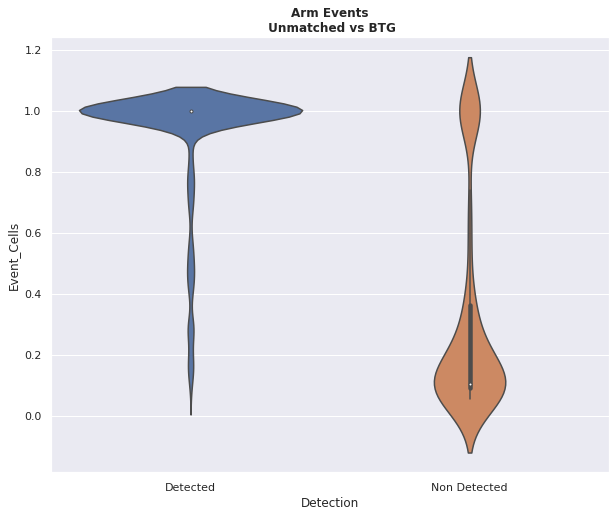

In [256]:
sns.set(rc={'figure.figsize':(10,8)})
#violin['Number']=violin['Number'].map(int)
ax = sns.violinplot(x="Detection", y="Event_Cells",data=I_cytobands_70_BTG_DETECT_CELLs_noSEX, dodge=False,split=True)
plt.title('Arm Events\n Unmatched vs BTG',weight='bold')
plt.show()

In [257]:
BTGs_focal_DETECT_TOTAL.head()

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection
16,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,Detected
39,6,168334813,168599019,3,2,1,0.752870,2,1,1,0.247130,IID_H158605_T01_01_WG01,3,0.752870,6_168334813_168599019_IID_H158605_T01_01_WG01,Detected
75,9,121179044,121295287,1,1,0,0.823502,2,1,1,0.176498,IID_H158606_T01_01_WG01,1,0.823502,9_121179044_121295287_IID_H158606_T01_01_WG01,Detected
108,14,107183620,107289436,1,1,0,0.844630,2,1,1,0.155370,IID_H158607_T01_01_WG01,1,0.844630,14_107183620_107289436_IID_H158607_T01_01_WG01,Detected
132,10,26729923,26784121,1,1,0,1.000000,2,1,1,0.000000,IID_H158608_T01_01_WG01,1,1.000000,10_26729923_26784121_IID_H158608_T01_01_WG01,Detected


In [258]:
BTGs_focal_DETECT_TOTAL_noSEX=BTGs_focal_DETECT_TOTAL[~(BTGs_focal_DETECT_TOTAL['chromosome']=='X')]
BTGs_focal_DETECT_TOTAL_noSEX.head()

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection
16,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,Detected
39,6,168334813,168599019,3,2,1,0.752870,2,1,1,0.247130,IID_H158605_T01_01_WG01,3,0.752870,6_168334813_168599019_IID_H158605_T01_01_WG01,Detected
75,9,121179044,121295287,1,1,0,0.823502,2,1,1,0.176498,IID_H158606_T01_01_WG01,1,0.823502,9_121179044_121295287_IID_H158606_T01_01_WG01,Detected
108,14,107183620,107289436,1,1,0,0.844630,2,1,1,0.155370,IID_H158607_T01_01_WG01,1,0.844630,14_107183620_107289436_IID_H158607_T01_01_WG01,Detected
132,10,26729923,26784121,1,1,0,1.000000,2,1,1,0.000000,IID_H158608_T01_01_WG01,1,1.000000,10_26729923_26784121_IID_H158608_T01_01_WG01,Detected


In [259]:
BTGs_focal_DETECT_TOTAL_noSEX_noNOISE=BTGs_focal_DETECT_TOTAL_noSEX[~( (BTGs_focal_DETECT_TOTAL_noSEX['Sample']=='IID_H158622_T01_01_WG01') | (BTGs_focal_DETECT_TOTAL_noSEX['Sample']=='IID_H158624_T01_01_WG01') )]

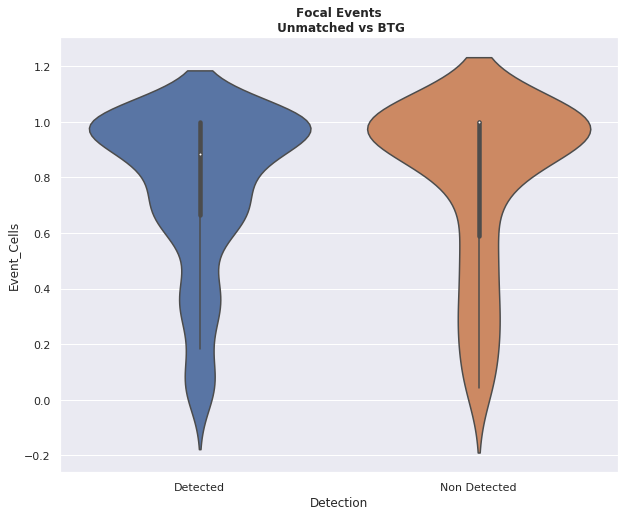

In [260]:
sns.set(rc={'figure.figsize':(10,8)})
#violin['Number']=violin['Number'].map(int)
ax = sns.violinplot(x="Detection", y="Event_Cells",data=BTGs_focal_DETECT_TOTAL_noSEX, dodge=False,split=True,order=["Detected", "Non Detected"])
plt.title('Focal Events\n Unmatched vs BTG',weight='bold')
plt.show()

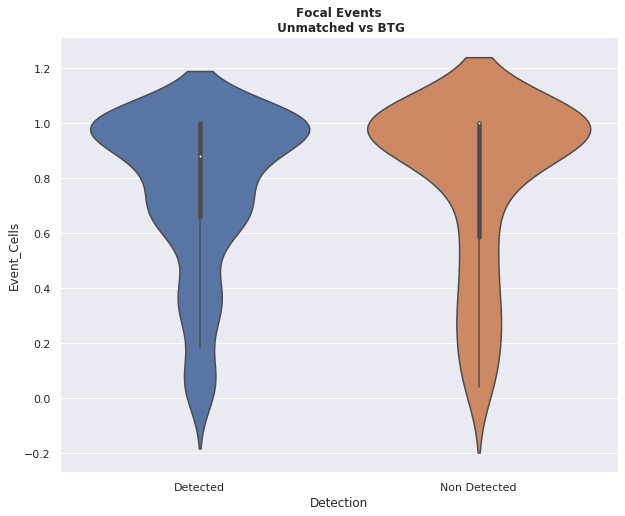

In [267]:
sns.set(rc={'figure.figsize':(10,8)})
#violin['Number']=violin['Number'].map(int)
ax = sns.violinplot(x="Detection", y="Event_Cells",data=BTGs_focal_DETECT_TOTAL_noSEX_noNOISE, dodge=False,split=True,order=["Detected", "Non Detected"])
plt.title('Focal Events\n Unmatched vs BTG',weight='bold')
plt.show()

In [269]:
BTGs_focal_DETECT_TOTAL_noSEX_noNOISE[BTGs_focal_DETECT_TOTAL_noSEX_noNOISE['Sample']=='IID_H158622_T01_01_WG01']

,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection


### Purity

In [261]:
BTG_directories_doc='/home/gutierj2/uk_all/321project_BATTENBERG_directories.list'
BTG_directories=!cat {BTG_directories_doc}

sample_list=[]
purity_list=[]

for n in BTG_directories:
    route=n+'/*_rho_and_psi.txt'
    path=!ls {route}
    
    sample=path[0].split('/')[8].split('_rho')[0]
    
    purity_file=pd.read_csv(path[0],sep='\t')
    for index,row in purity_file.iterrows():
        if(index=='FRAC_GENOME'):
            sample_list.append(sample)
            purity_list.append(row['rho'])
 
table_purity=pd.DataFrame()
table_purity['Sample']=sample_list
table_purity['Sample_x']=sample_list
table_purity['Purity']=purity_list


In [262]:
table_purity

,Sample,Sample_x,Purity
0,IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,0.910000
1,IID_H158607_T01_01_WG01,IID_H158607_T01_01_WG01,0.800000
2,IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,0.850000
3,IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,0.780000
4,IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01,0.921840
5,IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,0.504500
6,IID_H158617_T01_01_WG01,IID_H158617_T01_01_WG01,0.906300
7,IID_H158610_T01_01_WG01,IID_H158610_T01_01_WG01,0.893000
8,IID_H158611_T01_01_WG01,IID_H158611_T01_01_WG01,0.953000
9,IID_H158620_T01_01_WG01,IID_H158620_T01_01_WG01,0.964421


1) ARM

In [263]:
clonal_arm_BTG_DETECTION_PURITY=pd.merge(I_cytobands_70_BTG_DETECT_CELLs_noSEX,table_purity,on='Sample_x')
print(clonal_arm_BTG_DETECTION_PURITY.shape)
clonal_arm_BTG_DETECTION_PURITY.head()

(4745, 29)


,chr_seg,start_seg,end_seg,CNV,Sample_x,keys,chr_band,start_band,end_band,name_band,type_band,coor_band,Detection,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample_y,Event_CNV,Event_Cells,Sample,Purity
0,14,102635925,106019014,0,IID_H158604_T01_01_WG01,14_102635925_106019014_IID_H158604_T01_01_WG01,14,103200000,104000000,q32.32,gpos50,14q32.32,Detected,14,102635925,106019014,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,IID_H158604_T01_01_WG01,0.91000
1,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,18500000,19900000,p22.1,gneg,9p22.1,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793,IID_H158605_T01_01_WG01,0.78000
2,9,15424938,22351206,1,IID_H158605_T01_01_WG01,9_15424938_22351206_IID_H158605_T01_01_WG01,9,16600000,18500000,p22.2,gpos25,9p22.2,Detected,9,15424938,22351206,1,1,0,0.772793,2,1,1,0.227207,IID_H158605_T01_01_WG01,1,0.772793,IID_H158605_T01_01_WG01,0.78000
3,9,211725,37164374,1,IID_H158608_T01_01_WG01,9_211725_37164374_IID_H158608_T01_01_WG01,9,0,2200000,p24.3,gneg,9p24.3,Detected,9,211725,37164374,1,1,0,1.000000,2,1,1,0.000000,IID_H158608_T01_01_WG01,1,1.000000,IID_H158608_T01_01_WG01,0.92184
4,9,211725,37164374,1,IID_H158608_T01_01_WG01,9_211725_37164374_IID_H158608_T01_01_WG01,9,2200000,4600000,p24.2,gpos25,9p24.2,Detected,9,211725,37164374,1,1,0,1.000000,2,1,1,0.000000,IID_H158608_T01_01_WG01,1,1.000000,IID_H158608_T01_01_WG01,0.92184


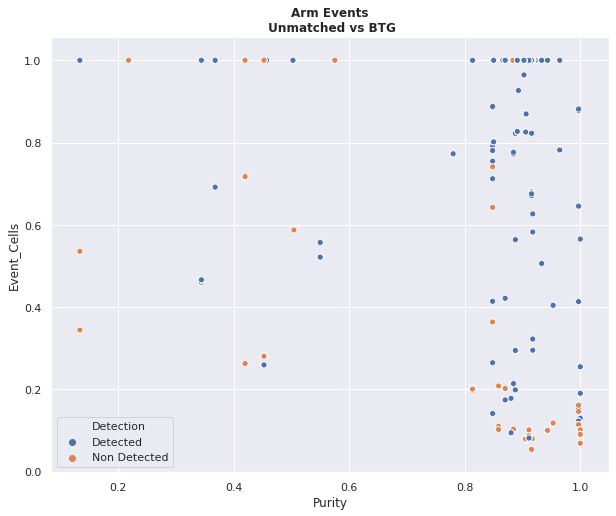

In [264]:
ax = sns.scatterplot(x="Purity", y="Event_Cells", hue="Detection", data=clonal_arm_BTG_DETECTION_PURITY)
plt.title('Arm Events\n Unmatched vs BTG',weight='bold')
plt.show()

2) FOCAL

In [265]:
clonal_focal_BTG_DETECTION_PURITY=pd.merge(BTGs_focal_DETECT_TOTAL_noSEX,table_purity,on='Sample')
print(clonal_focal_BTG_DETECTION_PURITY.shape)
clonal_focal_BTG_DETECTION_PURITY.head()

(404, 18)


,chromosome,start,end,Clone_CNV,Clone_Maj,Clone_Min,Clone_Cells,Subclone_CNV,Subclone_Maj,Subclone_Min,Subclone_Cells,Sample,Event_CNV,Event_Cells,keys,Detection,Sample_x,Purity
0,14,48292129,49460354,2,2,0,0.187030,3,2,1,0.812970,IID_H158604_T01_01_WG01,3,0.812970,14_48292129_49460354_IID_H158604_T01_01_WG01,Detected,IID_H158604_T01_01_WG01,0.91
1,14,22869678,23003877,0,0,0,1.000000,1,1,0,0.000000,IID_H158604_T01_01_WG01,0,1.000000,14_22869678_23003877_IID_H158604_T01_01_WG01,Non Detected,IID_H158604_T01_01_WG01,0.91
2,22,41443817,41525173,3,2,1,1.000000,2,1,1,0.000000,IID_H158604_T01_01_WG01,3,1.000000,22_41443817_41525173_IID_H158604_T01_01_WG01,Non Detected,IID_H158604_T01_01_WG01,0.91
3,6,168334813,168599019,3,2,1,0.752870,2,1,1,0.247130,IID_H158605_T01_01_WG01,3,0.752870,6_168334813_168599019_IID_H158605_T01_01_WG01,Detected,IID_H158605_T01_01_WG01,0.78
4,2,89247310,89325821,1,1,0,0.755009,2,1,1,0.244991,IID_H158605_T01_01_WG01,1,0.755009,2_89247310_89325821_IID_H158605_T01_01_WG01,Non Detected,IID_H158605_T01_01_WG01,0.78


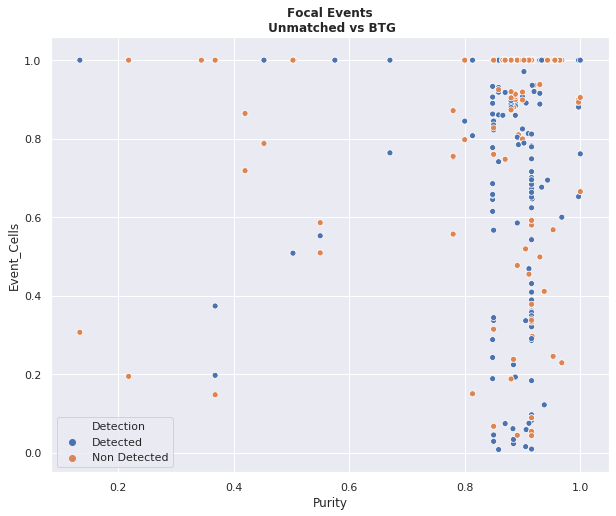

In [266]:
ax = sns.scatterplot(x="Purity", y="Event_Cells", hue="Detection",hue_order=["Detected", "Non Detected"], data=clonal_focal_BTG_DETECTION_PURITY)
plt.title('Focal Events\n Unmatched vs BTG',weight='bold')
plt.show()

In [271]:
clonal_focal_BTG_DETECTION_PURITY[clonal_focal_BTG_DETECTION_PURITY['Sample']=='IID_H158622_T01_01_WG01']
clonal_focal_BTG_DETECTION_PURITY_noNOISE=clonal_focal_BTG_DETECTION_PURITY[~( (clonal_focal_BTG_DETECTION_PURITY['Sample']=='IID_H158622_T01_01_WG01') | (clonal_focal_BTG_DETECTION_PURITY['Sample']=='IID_H158624_T01_01_WG01') )]

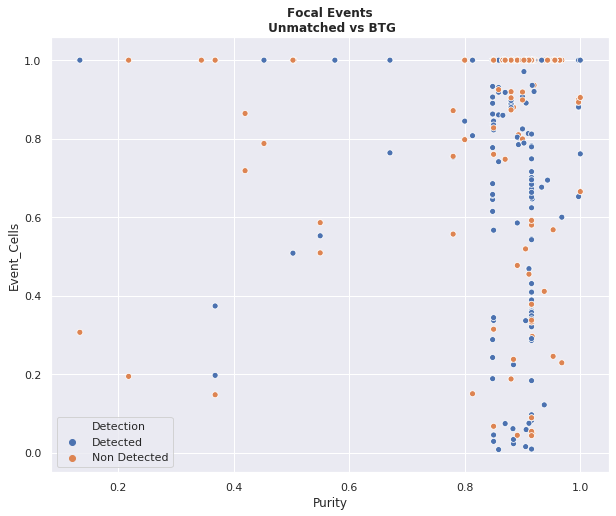

In [272]:
ax = sns.scatterplot(x="Purity", y="Event_Cells", hue="Detection",hue_order=["Detected", "Non Detected"], data=clonal_focal_BTG_DETECTION_PURITY_noNOISE)
plt.title('Focal Events\n Unmatched vs BTG',weight='bold')
plt.show()